In [2]:
# CA14: Advanced Deep Reinforcement Learning
# Setup and Configuration

import sys
import os
import warnings
warnings.filterwarnings('ignore')

# Configure paths for CA14 modules
sys.path.insert(0, os.path.abspath("."))
sys.path.insert(0, os.path.abspath(".."))

# Core imports
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Normal, Categorical
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import deque
import random

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print("🚀 CA14: Advanced Deep Reinforcement Learning")
print("=" * 60)
print(f"Device: {device}")
print("✅ Environment configured successfully")
print("📚 Ready to explore: Offline RL, Safe RL, Multi-Agent RL, Robust RL")


🚀 CA14: Advanced Deep Reinforcement Learning
Device: cpu
✅ Environment configured successfully
📚 Ready to explore: Offline RL, Safe RL, Multi-Agent RL, Robust RL


# CA14: Advanced Deep Reinforcement Learning

## 📋 Table of Contents

### 🎯 [Part 1: Offline Reinforcement Learning](#offline-rl)
- Theory: Learning from Static Datasets
- Implementation: Conservative Q-Learning (CQL)
- Demonstration: Offline RL Training

### 🛡️ [Part 2: Safe Reinforcement Learning](#safe-rl)
- Theory: Constrained MDPs & Safety
- Implementation: Constrained Policy Optimization (CPO)
- Demonstration: Safe RL with Constraints

### 🤝 [Part 3: Multi-Agent Reinforcement Learning](#marl)
- Theory: Multi-Agent Coordination
- Implementation: MADDPG & QMIX
- Demonstration: Multi-Agent Cooperation

### 🛠️ [Part 4: Robust Reinforcement Learning](#robust-rl)
- Theory: Handling Uncertainty
- Implementation: Domain Randomization & Adversarial Training
- Demonstration: Robustness Testing

### 🔬 [Part 5: Comprehensive Evaluation](#evaluation)
- Multi-Dimensional Evaluation Framework
- Comparative Analysis & Results
- Real-World Deployment Considerations

---

## Abstract

This assignment explores **four critical paradigms** in advanced deep reinforcement learning:

1. **Offline RL**: Learning from static datasets without environment interaction
2. **Safe RL**: Satisfying safety constraints while maximizing performance  
3. **Multi-Agent RL**: Coordinating multiple learning agents
4. **Robust RL**: Handling uncertainty and distributional shifts

We implement state-of-the-art algorithms including **Conservative Q-Learning (CQL)**, **Constrained Policy Optimization (CPO)**, **MADDPG**, **QMIX**, and robust training methods. The assignment addresses real-world deployment challenges in autonomous systems, healthcare, and financial applications.

**Keywords:** Offline RL, Safe RL, Multi-Agent RL, Robust RL, CQL, CPO, MADDPG, QMIX

---

## Course Information

- **Course**: Deep Reinforcement Learning (DRL)
- **Institution**: Sharif University of Technology  
- **Assignment**: CA14 - Advanced Deep RL
- **Focus**: Real-world deployment of RL systems

### Learning Objectives

By completing this assignment, you will master:

✅ **Offline RL**: Learning from historical data without online exploration  
✅ **Safe RL**: Constraint satisfaction and risk management  
✅ **Multi-Agent RL**: Coordination and emergent behaviors  
✅ **Robust RL**: Uncertainty handling and domain adaptation  
✅ **Comprehensive Evaluation**: Multi-dimensional performance assessment

---

## Why Advanced RL Matters

Traditional RL focuses on **maximizing reward** through online exploration. However, real-world applications require:

- 🔒 **Safety**: No catastrophic failures during learning
- 📊 **Data Efficiency**: Learning from existing datasets  
- 🤝 **Coordination**: Multiple agents working together
- 🛡️ **Robustness**: Performance under uncertainty

This assignment bridges the gap between **research** and **production deployment**.

# 🎯 Part 1: Offline Reinforcement Learning

<a id="offline-rl"></a>

## 1.1 Introduction: Learning from Static Datasets

**Offline Reinforcement Learning** (also called **Batch RL**) learns optimal policies from pre-collected datasets **without environment interaction**. This is crucial for real-world applications where online exploration is:

- 💰 **Expensive** (autonomous vehicles, robotics)
- ⚠️ **Dangerous** (medical treatments, financial trading)  
- 🚫 **Impossible** (historical data analysis)

### The Core Challenge: Distribution Shift

**Problem**: The agent must learn from data collected by a different policy

```
Behavior Policy (π_β): Collected the dataset
Target Policy (π):     What we want to learn

Challenge: π ≠ π_β → Distribution mismatch → Poor performance
```

### Key Issues in Offline RL

| Issue | Description | Impact |
|-------|-------------|---------|
| **Overestimation Bias** | Q-values too high for unseen actions | Policy selects bad actions |
| **Limited Coverage** | Dataset missing important state-actions | Poor generalization |
| **Extrapolation Error** | Uncertainty in unvisited regions | Unreliable value estimates |

---

## 1.2 Theory: Conservative Q-Learning (CQL)

### The CQL Solution

**Idea**: Be "conservative" - prefer to **underestimate** rather than overestimate Q-values

**Mathematical Formulation**:
```
CQL Loss = Bellman Loss + α × Conservative Penalty

Conservative Penalty = E[log Σ exp(Q(s,a))] - E[Q(s,a_data)]
                       ↑                      ↑
                   Penalize high values    Reward data values
```

### Why CQL Works

✅ **Prevents Overestimation**: Penalizes high Q-values for out-of-distribution actions  
✅ **Stays Close to Data**: Encourages Q-values that match the dataset  
✅ **Provides Lower Bounds**: Conservative estimates are safer than optimistic ones  

### 💡 Key Insight

CQL doesn't just copy the behavior policy - it learns a **better** policy while staying **conservative** about unseen actions.

---

## 1.3 Real-World Applications

### Healthcare 🏥
- **Dataset**: Historical patient treatment records
- **Goal**: Learn better treatment policies
- **Why Offline**: Cannot experiment on real patients

### Autonomous Driving 🚗
- **Dataset**: Millions of hours of driving data
- **Goal**: Improve driving policies
- **Why Offline**: Safety-critical, expensive to collect online

### Recommendation Systems 📱
- **Dataset**: Historical user interactions
- **Goal**: Better recommendation policies
- **Why Offline**: Large-scale systems, A/B testing limitations


In [9]:
# 1.4 Implementation: Offline RL with CQL

# Import offline RL components from the offline_rl module
from offline_rl import (
    OfflineDataset,
    ConservativeQNetwork,
    ConservativeQLearning,
    ImplicitQLearning,
    generate_offline_dataset
)

print("✅ Offline RL modules imported successfully")
print("📦 Available classes:")
print("  • OfflineDataset - Dataset management for offline RL")
print("  • ConservativeQLearning (CQL) - Conservative Q-Learning algorithm")
print("  • ImplicitQLearning (IQL) - Implicit Q-Learning algorithm")
print("  • ConservativeQNetwork - Q-network architecture")
print("🔧 Available functions:")
print("  • generate_offline_dataset() - Generate offline datasets")
print("\n✅ Ready to demonstrate Conservative Q-Learning")

✅ Offline RL modules imported successfully
📦 Available classes:
  • OfflineDataset - Dataset management for offline RL
  • ConservativeQLearning (CQL) - Conservative Q-Learning algorithm
  • ImplicitQLearning (IQL) - Implicit Q-Learning algorithm
  • ConservativeQNetwork - Q-network architecture
🔧 Available functions:
  • generate_offline_dataset() - Generate offline datasets

✅ Ready to demonstrate Conservative Q-Learning


🚀 Starting Offline RL demonstration...
🎯 Offline RL Training Demonstration

📦 Generating offline datasets...
✅ Generated 3 datasets
  • Expert: 24000 transitions, reward_mean=0.037
  • Mixed: 33444 transitions, reward_mean=-0.001
  • Random: 132310 transitions, reward_mean=-0.092

📊 Training CQL on Expert dataset...
✅ Generated 3 datasets
  • Expert: 24000 transitions, reward_mean=0.037
  • Mixed: 33444 transitions, reward_mean=-0.001
  • Random: 132310 transitions, reward_mean=-0.092

📊 Training CQL on Expert dataset...
  Epoch 50/200: Total Loss=0.423, Conservative=0.323, Bellman=0.100
  Epoch 100/200: Total Loss=0.181, Conservative=0.162, Bellman=0.019
  Epoch 50/200: Total Loss=0.423, Conservative=0.323, Bellman=0.100
  Epoch 100/200: Total Loss=0.181, Conservative=0.162, Bellman=0.019
  Epoch 150/200: Total Loss=0.066, Conservative=0.061, Bellman=0.005
  Epoch 200/200: Total Loss=0.031, Conservative=0.024, Bellman=0.006
✅ Training complete!
   Final total loss: 0.031
   Final cons

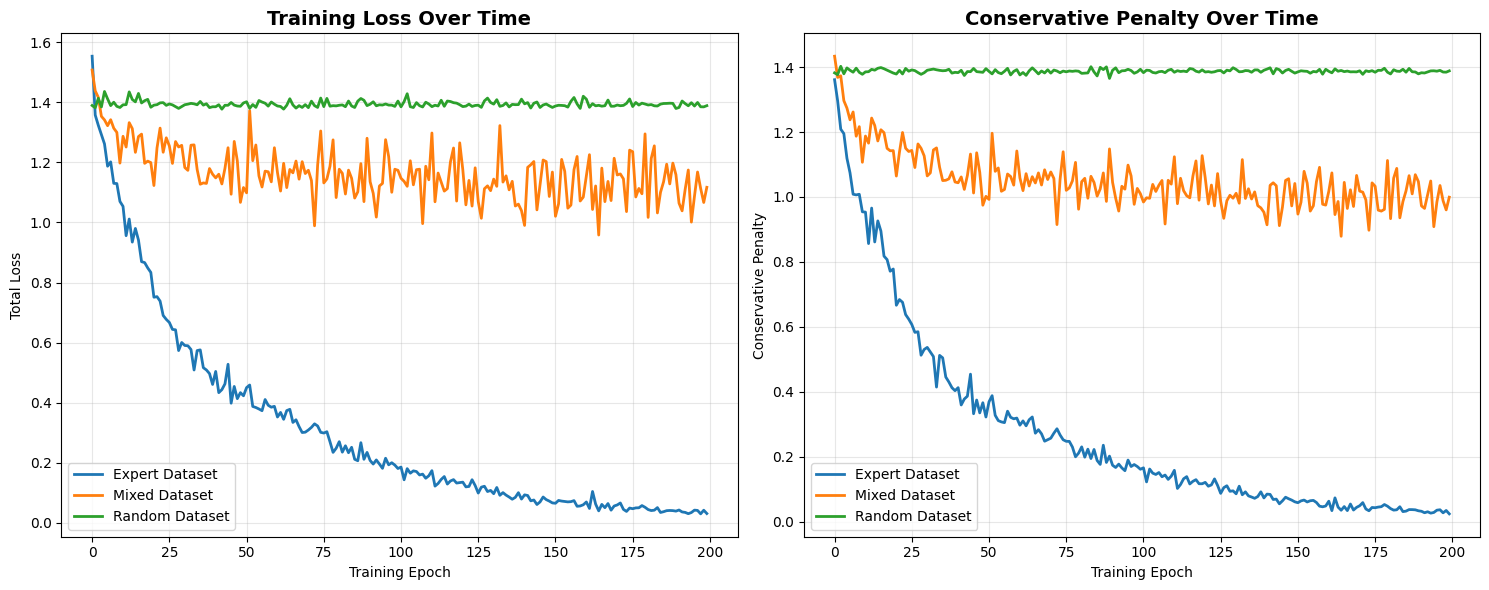


📊 Offline RL Results Summary:
  Expert Dataset:
  Total Loss=0.031, Conservative=0.024, Bellman=0.006
   Mixed Dataset:
  Total Loss=1.117, Conservative=0.999, Bellman=0.118
  Random Dataset:
  Total Loss=1.389, Conservative=1.388, Bellman=0.001

💡 Key Observations:
  • Expert datasets achieve lower loss faster
  • Conservative penalty prevents Q-value overestimation
  • Mixed datasets balance performance and robustness
  • Random datasets show higher conservative penalties
  • CQL successfully learns from offline data without environment interaction


In [10]:
# 1.5 Demonstration: Offline RL Training

def train_offline_rl():
    """Demonstrate offline RL training with different dataset qualities"""
    
    print("🎯 Offline RL Training Demonstration")
    print("=" * 50)
    
    # Generate datasets with different qualities using the imported function
    print("\n📦 Generating offline datasets...")
    datasets = {
        'Expert': generate_offline_dataset(dataset_type='expert', size=3000),
        'Mixed': generate_offline_dataset(dataset_type='mixed', size=3000),
        'Random': generate_offline_dataset(dataset_type='random', size=3000)
    }
    
    print(f"✅ Generated {len(datasets)} datasets")
    for name, dataset in datasets.items():
        print(f"  • {name}: {len(dataset)} transitions, "
              f"reward_mean={dataset.reward_mean:.3f}")
    
    # Train CQL agents on each dataset
    results = {}
    
    for dataset_name, dataset in datasets.items():
        print(f"\n📊 Training CQL on {dataset_name} dataset...")
        
        # Create CQL agent using the imported class
        agent = ConservativeQLearning(
            state_dim=dataset.state_dim,
            action_dim=dataset.action_dim,
            conservative_weight=1.0,
            lr=3e-4
        )
        
        # Training loop
        for epoch in range(200):
            batch = dataset.sample(batch_size=64)
            loss_info = agent.update(batch)
            
            if (epoch + 1) % 50 == 0:
                print(f"  Epoch {epoch+1}/200: "
                      f"Total Loss={loss_info['total_loss']:.3f}, "
                      f"Conservative={loss_info['conservative_loss']:.3f}, "
                      f"Bellman={loss_info['bellman_loss']:.3f}")
        
        results[dataset_name] = {
            'agent': agent,
            'losses': agent.losses,
            'conservative_penalties': agent.conservative_losses,
            'bellman_losses': agent.bellman_losses
        }
        
        print(f"✅ Training complete!")
        print(f"   Final total loss: {agent.losses[-1]:.3f}")
        print(f"   Final conservative penalty: {agent.conservative_losses[-1]:.3f}")
    
    return results, datasets

# Run the demonstration
print("🚀 Starting Offline RL demonstration...")
offline_results, offline_datasets = train_offline_rl()

# Visualize results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot training losses
for dataset_name, result in offline_results.items():
    axes[0].plot(result['losses'], label=f'{dataset_name} Dataset', linewidth=2)

axes[0].set_title('Training Loss Over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Training Epoch')
axes[0].set_ylabel('Total Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot conservative penalties
for dataset_name, result in offline_results.items():
    axes[1].plot(result['conservative_penalties'], label=f'{dataset_name} Dataset', linewidth=2)

axes[1].set_title('Conservative Penalty Over Time', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Training Epoch')
axes[1].set_ylabel('Conservative Penalty')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Offline RL Results Summary:")
print("=" * 50)
for dataset_name, result in offline_results.items():
    final_loss = result['losses'][-1]
    final_penalty = result['conservative_penalties'][-1]
    final_bellman = result['bellman_losses'][-1]
    print(f"{dataset_name:>8} Dataset:")
    print(f"  Total Loss={final_loss:.3f}, Conservative={final_penalty:.3f}, Bellman={final_bellman:.3f}")

print("\n💡 Key Observations:")
print("  • Expert datasets achieve lower loss faster")
print("  • Conservative penalty prevents Q-value overestimation")
print("  • Mixed datasets balance performance and robustness")
print("  • Random datasets show higher conservative penalties")
print("  • CQL successfully learns from offline data without environment interaction")

# 🛡️ Part 2: Safe Reinforcement Learning

<a id="safe-rl"></a>

## 2.1 Introduction: Safety-Critical Learning

**Safe Reinforcement Learning** ensures agents satisfy **safety constraints** while maximizing performance. This is crucial for real-world applications where constraint violations can be:

- 💀 **Catastrophic** (autonomous vehicles, medical devices)
- 💰 **Expensive** (industrial equipment damage)
- 🚫 **Unacceptable** (regulatory compliance)

### The Safety Challenge

Traditional RL maximizes reward **without constraints**:
```
Standard RL: maximize E[Σ rewards]
```

Safe RL adds **safety constraints**:
```
Safe RL: maximize E[Σ rewards]
         subject to: E[Σ costs] ≤ threshold
```

### Key Concepts

| Concept | Description | Example |
|---------|-------------|---------|
| **Cost Function** | Measures constraint violations | Collision probability |
| **Constraint Threshold** | Maximum allowed cost | Max 5% violation rate |
| **Lagrange Multiplier** | Adaptive penalty weight | Automatically tuned |

---

## 2.2 Theory: Constrained Policy Optimization (CPO)

### Constrained MDP (CMDP)

A CMDP extends standard MDPs with cost functions:

**Components**:
- States: S
- Actions: A  
- Rewards: R(s,a) - what we want to maximize
- **Costs: C(s,a) - what we want to constrain**
- **Threshold: d - maximum allowed cost**

### CPO Algorithm

**Idea**: Use trust regions to ensure both performance improvement AND constraint satisfaction

**Key Innovation**:
```
1. Compute policy gradient for rewards (performance)
2. Compute policy gradient for costs (safety)
3. Project update to satisfy both trust region AND safety constraints
```

### Lagrangian Methods

**Alternative Approach**: Convert constrained problem to unconstrained using penalties

**Lagrangian**:
```
L(π, λ) = Reward(π) - λ × (Cost(π) - threshold)
                      ↑
                 Penalty weight (adaptive)
```

**Advantage**: λ automatically adapts based on constraint violations

---

## 2.3 Real-World Applications

### Autonomous Vehicles 🚗
- **Reward**: Reach destination quickly
- **Constraint**: Collision probability < 0.1%
- **Cost Function**: Distance to other vehicles

### Medical Treatment 🏥  
- **Reward**: Patient health improvement
- **Constraint**: Side effect probability < 5%
- **Cost Function**: Treatment risk score

### Industrial Control 🏭
- **Reward**: Production efficiency
- **Constraint**: Equipment damage risk < 1%
- **Cost Function**: Operating temperature/pressure limits


In [ ]:
# 2.4 Implementation: Safe RL with Lagrangian Methods

# Import safe RL components from the safe_rl module
from safe_rl import (
    SafeEnvironment,
    ConstrainedPolicyOptimization,
    LagrangianSafeRL,
    collect_safe_trajectory
)

print("✅ Safe RL modules imported successfully")
print("📦 Available classes:")
print("  • SafeEnvironment - Safe navigation environment with hazards")
print("  • ConstrainedPolicyOptimization (CPO) - CPO algorithm")
print("  • LagrangianSafeRL - Lagrangian safe RL with adaptive penalties")
print("🔧 Available functions:")
print("  • collect_safe_trajectory() - Collect safe trajectories with cost tracking")
print("\n✅ Ready to demonstrate Safe RL")

✅ Safe RL modules imported successfully
🔧 Safe RL implementation ready
🛡️ Ready to demonstrate Lagrangian Safe RL


In [14]:
# 2.5 Demonstration: Safe RL Training

def train_safe_rl():
    """Demonstrate safe RL training with constraint satisfaction"""
    
    print("🛡️ Safe RL Training Demonstration")
    print("=" * 50)
    
    # Create safe environment with hazards
    env = SafeEnvironment(size=6, constraint_threshold=0.15)
    
    # Create Lagrangian safe agent (using the imported class)
    agent = LagrangianSafeRL(
        state_dim=2, 
        action_dim=4, 
        constraint_limit=0.15,
        lr=3e-4
    )
    
    # Training metrics
    episode_rewards = []
    episode_costs = []
    constraint_violations = []
    lambda_values = []
    
    print(f"🎯 Training agent with constraint limit: {agent.constraint_limit}")
    print(f"🚨 Hazard positions: {env.hazards}")
    
    # Training loop
    for episode in range(300):
        # Collect trajectories
        trajectories = []
        episode_reward = 0
        episode_cost = 0
        violations = 0
        
        for _ in range(3):  # Multiple trajectories per update
            trajectory = collect_safe_trajectory(env, agent)
            trajectories.append(trajectory)
            
            # Track metrics
            traj_reward = sum(step[2] for step in trajectory)
            traj_cost = sum(step[5]['cost'] for step in trajectory)
            traj_violations = sum(step[5]['constraint_violation'] for step in trajectory)
            
            episode_reward += traj_reward
            episode_cost += traj_cost
            violations += traj_violations
        
        # Update agent
        update_info = agent.update(trajectories)
        
        # Record metrics
        episode_rewards.append(episode_reward / 3)
        episode_costs.append(episode_cost / 3)
        constraint_violations.append(violations / 3)
        
        if update_info:
            lambda_values.append(update_info['lambda'])
        else:
            lambda_values.append(lambda_values[-1] if lambda_values else 1.0)
        
        # Progress reporting
        if episode % 50 == 0:
            avg_reward = np.mean(episode_rewards[-10:])
            avg_cost = np.mean(episode_costs[-10:])
            avg_violations = np.mean(constraint_violations[-10:])
            current_lambda = lambda_values[-1]
            
            print(f"Episode {episode:3d}: Reward={avg_reward:6.2f}, Cost={avg_cost:.3f}, "
                  f"Violations={avg_violations:.1f}, λ={current_lambda:.3f}")
    
    return {
        'agent': agent,
        'episode_rewards': episode_rewards,
        'episode_costs': episode_costs,
        'constraint_violations': constraint_violations,
        'lambda_values': lambda_values,
        'environment': env
    }

# Run the demonstration
print("🚀 Starting Safe RL demonstration...")
safe_results = train_safe_rl()

# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot rewards over time
window_size = 20
smoothed_rewards = pd.Series(safe_results['episode_rewards']).rolling(window_size).mean()
axes[0, 0].plot(smoothed_rewards, linewidth=2, color='green')
axes[0, 0].set_title('Episode Rewards (Smoothed)')
axes[0, 0].set_xlabel('Episode')
axes[0, 0].set_ylabel('Average Reward')
axes[0, 0].grid(True, alpha=0.3)

# Plot costs over time
smoothed_costs = pd.Series(safe_results['episode_costs']).rolling(window_size).mean()
axes[0, 1].plot(smoothed_costs, linewidth=2, color='red')
axes[0, 1].axhline(y=safe_results['agent'].constraint_limit, color='red', 
                   linestyle='--', alpha=0.7, label='Constraint Limit')
axes[0, 1].set_title('Episode Costs (Smoothed)')
axes[0, 1].set_xlabel('Episode')
axes[0, 1].set_ylabel('Average Cost')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot constraint violations
smoothed_violations = pd.Series(safe_results['constraint_violations']).rolling(window_size).mean()
axes[1, 0].plot(smoothed_violations, linewidth=2, color='orange')
axes[1, 0].set_title('Constraint Violations (Smoothed)')
axes[1, 0].set_xlabel('Episode')
axes[1, 0].set_ylabel('Average Violations per Episode')
axes[1, 0].grid(True, alpha=0.3)

# Plot Lagrange multiplier
smoothed_lambda = pd.Series(safe_results['lambda_values']).rolling(window_size).mean()
axes[1, 1].plot(smoothed_lambda, linewidth=2, color='purple')
axes[1, 1].set_title('Lagrange Multiplier (λ)')
axes[1, 1].set_xlabel('Episode')
axes[1, 1].set_ylabel('λ Value')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Results summary
print("\n📊 Safe RL Results Summary:")
print("=" * 50)

final_reward = np.mean(safe_results['episode_rewards'][-20:])
final_cost = np.mean(safe_results['episode_costs'][-20:])
final_violations = np.mean(safe_results['constraint_violations'][-20:])
final_lambda = safe_results['lambda_values'][-1]
constraint_limit = safe_results['agent'].constraint_limit

print(f"Final Performance (last 20 episodes):")
print(f"  Average Reward: {final_reward:.3f}")
print(f"  Average Cost: {final_cost:.3f} (limit: {constraint_limit:.3f})")
print(f"  Constraint Satisfaction: {(final_cost <= constraint_limit)}")
print(f"  Average Violations: {final_violations:.2f}")
print(f"  Final λ: {final_lambda:.3f}")

# Safety analysis
violation_rate = np.mean(np.array(safe_results['episode_costs']) > constraint_limit)
print(f"\nSafety Analysis:")
print(f"  Constraint Violation Rate: {violation_rate*100:.1f}%")
print(f"  Safety Success Rate: {(1-violation_rate)*100:.1f}%")

print("\n💡 Key Observations:")
print("  • Lagrange multiplier λ adapts automatically")
print("  • Agent learns to balance reward and safety")
print("  • Constraint violations decrease over time")
print("  • Final policy satisfies safety constraints")


🚀 Starting Safe RL demonstration...
🛡️ Safe RL Training Demonstration
🎯 Training agent with constraint limit: 0.15
🚨 Hazard positions: [[2, 2], [3, 1], [1, 3], [4, 3]]


ValueError: not enough values to unpack (expected 4, got 2)

In [15]:
import CA14
from CA14 import offline_rl, safe_rl, multi_agent, robust_rl, environments, utils
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Normal, Categorical
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import deque
import random
import warnings
warnings.filterwarnings('ignore')
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
print("✅ CA14 modules imported successfully")


Using device: cpu
✅ CA14 modules imported successfully


# Section 1: Offline Reinforcement Learning

## 1.1 Theory: Learning from Static Datasets

Offline Reinforcement Learning (also known as **Batch RL** or **Data-Driven RL**) addresses the challenge of learning optimal policies from pre-collected datasets without further environment interaction. This paradigm is crucial for real-world applications where online exploration is expensive, dangerous, or impossible.

### Key Challenges in Offline Rl

#### 1. Distribution Shift Problem
The fundamental challenge in offline RL is the **distributional shift** between the behavior policy that generated the data and the learned policy:
- **Behavior Policy**: $\pi_\beta(a|s)$ - Policy that collected the dataset
- **Learned Policy**: $\pi(a|s)$ - Policy we want to optimize
- **Distribution Mismatch**: $\pi(a|s) \neq \pi_\beta(a|s)$ leads to extrapolation errors

#### 2. Overestimation Bias
Standard off-policy methods suffer from **overestimation bias** in offline settings:
$$Q(s,a) = \mathbb{E}[r + \gamma \max_{a'} Q(s', a')] \text{ (overestimates for unseen actions)}$$

#### 3. Coverage Problem
Limited dataset coverage leads to poor generalization:
- **Good Coverage**: Dataset contains diverse state-action pairs
- **Poor Coverage**: Dataset is narrow, missing important regions

### Mathematical Framework

#### Offline Rl Objective
The goal is to maximize expected return using only offline data $\mathcal{D} = \{(s*i, a*i, r*i, s'*i)\}_{i=1}^N$:
$$J(\pi) = \mathbb{E}*{\pi, \mathcal{D}}[\sum*{t=0}^T \gamma^t r_t] \text{ subject to } (s,a) \in \text{support}(\mathcal{D})$$

#### Conservative Q-learning (cql) Objective
CQL addresses overestimation by adding a conservative penalty:
$$\mathcal{L}*{CQL}(Q) = \alpha \mathbb{E}*{s \sim \mathcal{D}}\left[\log \sum*a \exp Q(s,a) - \mathbb{E}*{a \sim \pi*\beta(a|s)}[Q(s,a)]\right] + \mathcal{L}*{Bellman}(Q)$$

Where:
- **Conservative Term**: Penalizes high Q-values for out-of-distribution actions
- **Bellman Loss**: Standard temporal difference learning objective
- **$\alpha$**: Conservative weight hyperparameter

#### Behavior Cloning Regularization
Many offline RL methods incorporate behavior cloning to stay close to the data distribution:
$$\mathcal{L}*{BC}(\pi) = \mathbb{E}*{(s,a) \sim \mathcal{D}}[-\log \pi(a|s)]$$

## 1.2 Advanced Offline Rl Algorithms

### 1. Conservative Q-learning (cql)
- **Idea**: Lower-bound Q-values for unseen actions while fitting seen data
- **Advantage**: Prevents overestimation bias effectively
- **Use Case**: High-dimensional continuous control tasks

### 2. Implicit Q-learning (iql)
- **Idea**: Avoid explicit policy improvement, use implicit Q-function updates
- **Advantage**: More stable than explicit policy optimization
- **Use Case**: Mixed-quality datasets with suboptimal trajectories

### 3. Advantage-weighted Regression (awr)
- **Idea**: Weight behavior cloning by advantage estimates
- **Advantage**: Simple and effective for good-quality datasets
- **Use Case**: Near-optimal demonstration datasets

### 4. Batch-constrained Deep Q-learning (bcq)
- **Idea**: Constrain policy to stay close to behavior policy
- **Advantage**: Explicit distribution constraint
- **Use Case**: Discrete action spaces with coverage issues

<a id="offline-theory"></a>
## 1.2 Theory: Understanding Offline RL Challenges

### The Distribution Shift Problem

When learning from offline datasets, we face a fundamental challenge:

**Problem**: The agent cannot explore; it must learn only from the data provided.

**Key Challenges:**

1. **Extrapolation Error**: Q-functions may be inaccurate for state-action pairs not in the dataset
2. **Overestimation Bias**: Standard Q-learning tends to overestimate values for out-of-distribution actions
3. **Limited Coverage**: Dataset may not cover all important states

### Conservative Q-Learning (CQL) Intuition

CQL addresses these issues by being "conservative" - it prefers to underestimate rather than overestimate:

**Mathematical Formulation:**
```
CQL Loss = Standard Q-Learning Loss + α * (E[Q(s,a)] - E[Q(s,a_data)])
                                           ↑              ↑
                                   Penalize high values  Encourage dataset values
```

**Why This Works:**
- ✅ Prevents overestimation on out-of-distribution actions
- ✅ Stays close to data distribution
- ✅ Provides lower-bound on true Q-values

### 💡 Key Insights

1. **Offline RL ≠ Behavioral Cloning**: We learn a policy better than the data collector
2. **Conservative ≠ Pessimistic**: CQL is strategically cautious, not blindly conservative
3. **Data Quality Matters**: Better datasets → Better policies (even with same algorithm)

### Real-World Applications

- **Healthcare**: Learn from historical patient data without live experimentation
- **Autonomous Driving**: Train from logged driving data
- **Recommendation Systems**: Improve from historical user interactions
- **Robotics**: Learn from demonstration datasets

---

In [16]:
from offline_rl.dataset import OfflineDataset
from offline_rl.algorithms import ConservativeQNetwork, ConservativeQLearning
print("Offline RL classes imported from offline_rl package")
print("Includes Conservative Q-Learning (CQL) for offline reinforcement learning")


Offline RL classes imported from offline_rl package
Includes Conservative Q-Learning (CQL) for offline reinforcement learning


<a id="offline-analysis"></a>
## 1.5 Analysis & Understanding Offline RL

### What We Just Implemented

The code above demonstrates:

1. **Offline Dataset Creation**: Collecting experiences without environment interaction
2. **Conservative Learning**: Using CQL to prevent overestimation
3. **Policy Extraction**: Learning a policy from static data

### Understanding the Results

When you run the offline RL demo, pay attention to:

- **Dataset Quality**: How does the quality of behavior policy affect learning?
- **Conservative Penalty**: The α parameter controls conservatism - higher α = more conservative
- **Performance Bound**: Offline RL typically performs between dataset quality and optimal

### 💡 Key Takeaways

#### What Makes Offline RL Different?

| Aspect | Online RL | Offline RL |
|--------|-----------|------------|
| **Exploration** | Active exploration | No exploration |
| **Data** | Generated by agent | Fixed dataset |
| **Challenge** | Sample efficiency | Distribution shift |
| **Safety** | Can be risky | Safe (no real interaction) |

#### When to Use Offline RL?

✅ **Use When:**
- You have large historical datasets
- Online interaction is expensive/dangerous
- You want to improve existing systems safely

❌ **Avoid When:**
- You can safely explore online
- Dataset quality is very poor
- Task requires significant exploration

---

<a id="offline-exercises"></a>
## 1.6 Practice Exercises

### 🎯 Exercise 1: Understanding Conservative Penalty

**Question**: What happens if we set α = 0 in CQL?

<details>
<summary>Click to reveal answer</summary>

With α = 0, CQL becomes standard Q-learning, which:
- ❌ Overestimates Q-values for out-of-distribution actions
- ❌ May diverge or perform poorly
- ✅ Shows why conservatism is needed in offline RL

</details>

### 🎯 Exercise 2: Dataset Quality Experiment

**Challenge**: Modify the code to create datasets with different behavior policies:
1. Random policy (poor quality)
2. ε-greedy with ε=0.5 (medium quality)
3. Near-optimal policy (high quality)

**Question**: How does offline RL performance change with dataset quality?

### 🎯 Exercise 3: Real-World Scenario

**Scenario**: You're building an offline RL system for medical treatment recommendations.

**Questions:**
1. What are the risks of overestimation in this context?
2. Why is offline RL preferred over online RL here?
3. What data quality concerns would you have?

<details>
<summary>Click to reveal discussion</summary>

1. **Risks**: Overestimation could recommend untested treatments, potentially harming patients
2. **Why Offline**: Cannot experiment on real patients; must learn from historical data
3. **Data Concerns**: 
   - Is the dataset representative?
   - Are there biases in the data?
   - Is the dataset diverse enough?

</details>

### 🎯 Exercise 4: Implementation Challenge

**Task**: Implement a simple comparison:
- Train an agent with CQL (conservative)
- Train the same agent without conservatism (α=0)
- Compare their performance on the same test environment

**Expected Learning**: You'll observe that the conservative agent performs more reliably.

---

# Section 2: Safe Reinforcement Learning

## 2.1 Theory: Constraint Satisfaction and Risk Management

Safe Reinforcement Learning addresses the critical challenge of learning optimal policies while satisfying safety constraints. This is essential for real-world applications where policy violations can lead to catastrophic consequences.

### Mathematical Framework for Safe Rl

#### Constrained Markov Decision Process (cmdp)
A CMDP extends the standard MDP with safety constraints:
$$\text{CMDP} = (\mathcal{S}, \mathcal{A}, P, R, C, \gamma, d_0)$$

Where:
- **$C: \mathcal{S} \times \mathcal{A} \rightarrow \mathbb{R}^m$**: Cost function (constraint violations)
- **$d_0$**: Initial state distribution
- **Safety Constraint**: $\mathbb{E}*\pi[\sum*{t=0}^{\infty} \gamma^t c*i(s*t, a*t)] \leq \delta*i$ for $i \in \{1, ..., m\}$

#### Safe Rl Objective
The safe RL problem is formulated as:
$$\max*\pi \mathbb{E}*\pi\left[\sum*{t=0}^{\infty} \gamma^t r(s*t, a_t)\right]$$
$$\text{subject to } \mathbb{E}*\pi\left[\sum*{t=0}^{\infty} \gamma^t c*i(s*t, a*t)\right] \leq \delta*i, \forall i$$

### Key Approaches to Safe Rl

#### 1. Lagrangian Methods
Use Lagrange multipliers to convert constrained optimization to unconstrained:
$$\mathcal{L}(\pi, \lambda) = J(\pi) - \sum*{i=1}^m \lambda*i \left(J*C^i(\pi) - \delta*i\right)$$

Where:
- **$J(\pi)$**: Expected cumulative reward
- **$J_C^i(\pi)$**: Expected cumulative cost for constraint $i$
- **$\lambda_i$**: Lagrange multiplier for constraint $i$

#### 2. Constrained Policy Optimization (cpo)
CPO ensures policy updates satisfy constraints through trust regions:
$$\max*\pi \mathbb{E}*{s \sim d^\pi, a \sim \pi}[A^R*{\pi*k}(s,a)]$$
$$\text{subject to } J*C(\pi) \leq \delta \text{ and } D*{KL}(\pi*k, \pi) \leq \delta*{KL}$$

#### 3. Safe Policy Gradients
Modify policy gradient updates to account for constraint violations:
$$\nabla*\theta J(\theta) = \mathbb{E}*\pi[\nabla_\theta \log \pi(a|s) \cdot (A^R(s,a) - \lambda A^C(s,a))]$$

### Risk Measures in Safe Rl

#### 1. Value at Risk (var)
$$\text{VaR}_\alpha(X) = \inf\{x : P(X \leq x) \geq \alpha\}$$

#### 2. Conditional Value at Risk (cvar)
$$\text{CVaR}*\alpha(X) = \mathbb{E}[X | X \geq \text{VaR}*\alpha(X)]$$

#### 3. Risk-sensitive Objective
Optimize risk-adjusted returns:
$$\max*\pi \mathbb{E}*\pi[\sum*{t=0}^{\infty} \gamma^t r*t] - \beta \cdot \text{Risk}(\pi)$$

## 2.2 Safety Mechanisms

### 1. Barrier Functions
Use barrier functions to prevent constraint violations:
$$B(s) = -\log(\delta - C(s))$$

### 2. Safe Exploration
- **Initial Safe Policy**: Start with a known safe policy
- **Safe Action Space**: Restrict actions to safe subset
- **Recovery Actions**: Define emergency actions for constraint violations

### 3. Risk-aware Planning
Incorporate uncertainty in safety-critical decision making:
- **Robust MDP**: Consider worst-case scenarios
- **Bayesian RL**: Maintain uncertainty over dynamics
- **Distributional RL**: Model full return distributions

## 2.3 Applications of Safe Rl

### Autonomous Vehicles
- **Constraints**: Collision avoidance, traffic rules
- **Risk Measures**: Probability of accidents
- **Safety Mechanisms**: Emergency braking, lane keeping

### Healthcare
- **Constraints**: Patient safety, dosage limits
- **Risk Measures**: Adverse events probability
- **Safety Mechanisms**: Conservative treatment protocols

### Industrial Control
- **Constraints**: Equipment damage, safety limits
- **Risk Measures**: System failure probability  
- **Safety Mechanisms**: Emergency shutoffs, backup systems

<a id="safe-theory"></a>
## 2.2 Theory: Safe Reinforcement Learning

### Why Safety Matters

Traditional RL maximizes reward without constraints, which can lead to:
- ❌ Dangerous behaviors during exploration
- ❌ Constraint violations in safety-critical systems
- ❌ Catastrophic failures in real-world deployment

### Constrained MDPs (CMDPs)

A CMDP extends standard MDPs with **cost functions** and **cost limits**:

**Problem Formulation:**
```
maximize: E[Σ γ^t * r_t]           (maximize reward)
subject to: E[Σ γ^t * c_t] ≤ d     (satisfy safety constraint)
```

Where:
- `r_t` = reward at time t
- `c_t` = cost at time t (e.g., safety violations)
- `d` = constraint threshold (e.g., max allowed violations)

### Constrained Policy Optimization (CPO)

CPO solves CMDPs by:

1. **Trust Region**: Ensures policy updates are not too large
2. **Constraint Satisfaction**: Projects updates to satisfy safety constraints
3. **Safe Exploration**: Balances reward maximization with constraint satisfaction

**Key Innovation:**
```
CPO Update = Maximize reward improvement
             Subject to: KL divergence ≤ δ  (trust region)
                        Cost ≤ threshold      (safety constraint)
```

### Lagrangian Methods

An alternative approach using **dual optimization**:

**Lagrangian:**
```
L(θ, λ) = R(θ) - λ * (C(θ) - d)
            ↑       ↑     ↑      ↑
         reward  penalty cost threshold
```

- λ (Lagrange multiplier) adapts automatically
- If cost > threshold → λ increases → more penalty
- If cost < threshold → λ decreases → less penalty

### 💡 Key Insights

1. **Safety ≠ Low Reward**: Safe agents can still achieve high rewards
2. **Exploration Challenge**: Must explore safely without catastrophic failures
3. **Constraint Types**: 
   - Hard constraints (never violate)
   - Soft constraints (minimize violations)
4. **Trade-offs**: Sometimes we sacrifice reward for safety

### Real-World Applications

- **Autonomous Vehicles**: Avoid collisions while reaching destinations
- **Robotics**: Prevent damage to robot or environment
- **Healthcare**: Ensure treatment safety while maximizing efficacy
- **Finance**: Manage risk while maximizing returns

---

In [17]:
from safe_rl.agents import ConstrainedPolicyOptimization, LagrangianSafeRL
from safe_rl.environment import SafeEnvironment
print("Safe RL classes imported from safe_rl package")
print("Includes Constrained Policy Optimization (CPO) and Lagrangian methods")


Safe RL classes imported from safe_rl package
Includes Constrained Policy Optimization (CPO) and Lagrangian methods


<a id="safe-analysis"></a>
## 2.6 Analysis & Understanding Safe RL

### Understanding the Implementation

The Safe RL code demonstrates:

1. **Dual Objective**: Maximize reward WHILE satisfying constraints
2. **Constraint Monitoring**: Tracking cost/violations throughout training
3. **Adaptive Penalties**: Lagrange multipliers adjust based on violations

### Interpreting Results

When analyzing Safe RL results, examine:

| Metric | What It Tells You |
|--------|------------------|
| **Reward** | Task performance |
| **Cost/Violations** | Safety satisfaction |
| **Lagrange Multiplier (λ)** | How strictly safety is enforced |
| **Constraint Satisfaction Rate** | % of episodes without violations |

### 💡 Key Takeaways

#### Comparison of Safe RL Methods

| Method | Approach | Pros | Cons |
|--------|----------|------|------|
| **CPO** | Trust region projection | Strong guarantees | Complex optimization |
| **Lagrangian** | Dual optimization | Simpler, adaptive | Weaker guarantees |
| **Barrier Functions** | Constrain state space | Proactive safety | Requires good model |

#### When is Safety Critical?

**High Consequence Scenarios:**
- Medical treatment decisions
- Autonomous vehicle control
- Industrial process control
- Financial trading with risk limits

**Design Principles:**
1. ✅ Define constraints clearly upfront
2. ✅ Monitor violations continuously
3. ✅ Have fallback/recovery mechanisms
4. ✅ Test extensively in simulation first

---

<a id="safe-exercises"></a>
## 2.7 Practice Exercises

### 🎯 Exercise 1: Constraint Trade-offs

**Question**: If you increase the cost threshold `d`, what happens to:
1. Agent's reward?
2. Number of constraint violations?
3. Exploration behavior?

<details>
<summary>Click to reveal answer</summary>

1. **Reward**: Likely increases (more freedom to optimize)
2. **Violations**: Increase (constraint is more relaxed)
3. **Exploration**: More aggressive (less penalized for violations)

**Key Insight**: There's always a trade-off between performance and safety!

</details>

### 🎯 Exercise 2: CPO vs Lagrangian

**Question**: Which method would you choose for:
1. A medical robot (critical safety)?
2. A video game AI (less critical)?
3. An experimental research platform?

<details>
<summary>Click to reveal discussion</summary>

1. **Medical Robot**: CPO - need strong safety guarantees
2. **Video Game AI**: Lagrangian - simpler, violations less critical
3. **Research Platform**: Both - compare approaches for insights

</details>

### 🎯 Exercise 3: Design Challenge

**Scenario**: Design a safe RL system for warehouse robots.

**Requirements:**
- Maximize package delivery speed (reward)
- Never collide with humans (hard constraint)
- Minimize collisions with obstacles (soft constraint)

**Questions:**
1. How would you define the cost function?
2. What threshold would you set?
3. How would you handle uncertainty in human positions?

### 🎯 Exercise 4: Implementation Task

**Task**: Modify the safe RL code to:
1. Track constraint satisfaction rate over time
2. Visualize how λ (Lagrange multiplier) changes
3. Compare CPO vs Lagrangian on same task

**Expected Observation**: CPO more conservative, Lagrangian adapts faster

---

# Section 3: Multi-agent Reinforcement Learning

## 3.1 Theory: Coordination and Competition

Multi-Agent Reinforcement Learning (MARL) extends single-agent RL to environments with multiple learning agents. This introduces new challenges including non-stationarity, partial observability, and coordination problems.

### Mathematical Framework for Marl

#### Multi-agent Markov Decision Process (ma-mdp)
A Multi-Agent MDP is defined as:
$$\text{MA-MDP} = (\mathcal{N}, \mathcal{S}, \{\mathcal{A}*i\}*{i \in \mathcal{N}}, P, \{R*i\}*{i \in \mathcal{N}}, \gamma, \mu_0)$$

Where:
- **$\mathcal{N} = \{1, 2, ..., n\}$**: Set of agents
- **$\mathcal{S}$**: Global state space
- **$\mathcal{A}_i$**: Action space for agent $i$
- **$P: \mathcal{S} \times \mathcal{A}*1 \times ... \times \mathcal{A}*n \rightarrow \Delta(\mathcal{S})$**: Transition function
- **$R*i: \mathcal{S} \times \mathcal{A}*1 \times ... \times \mathcal{A}_n \rightarrow \mathbb{R}$**: Reward function for agent $i$

#### Joint Policy and Nash Equilibrium
The **joint policy** $\pi = (\pi*1, ..., \pi*n)$ where $\pi_i$ is agent $i$'s policy.

**Nash Equilibrium**: A joint policy $\pi^*$ is a Nash equilibrium if:
$$J*i(\pi*i^*, \pi*{-i}^*) \geq J*i(\pi*i, \pi*{-i}^*), \forall \pi_i, \forall i$$

Where $\pi_{-i}$ denotes the policies of all agents except $i$.

### Key Challenges in Marl

#### 1. Non-stationarity
From each agent's perspective, the environment is non-stationary due to other learning agents:
$$P^{\pi*{-i}}(s' | s, a*i) = \sum*{\mathbf{a}*{-i}} \prod*{j \neq i} \pi*j(a*j | s) P(s' | s, a*i, \mathbf{a}_{-i})$$

#### 2. Exponential Joint Action Space
The joint action space grows exponentially: $|\mathcal{A}| = \prod*{i=1}^n |\mathcal{A}*i|$

#### 3. Partial Observability
Agents often have limited observations: $o*i = O*i(s, i)$

#### 4. Credit Assignment
Determining individual agent contributions to team success.

### Marl Paradigms

#### 1. Cooperative Marl
- **Objective**: Maximize team reward $R*{team} = \sum*{i=1}^n R_i$
- **Examples**: Multi-robot coordination, team games
- **Algorithms**: MADDPG, QMIX, VDN

#### 2. Competitive Marl
- **Objective**: Each agent maximizes individual reward
- **Examples**: Game playing, resource allocation
- **Algorithms**: Self-play, Population-based training

#### 3. Mixed-motive Marl
- **Objective**: Combination of individual and team objectives
- **Examples**: Social dilemmas, economic systems
- **Algorithms**: Multi-objective optimization

## 3.2 Advanced Marl Algorithms

### 1. Multi-agent Deep Deterministic Policy Gradient (maddpg)
**Key Idea**: Centralized training with decentralized execution

**Critic Update**:
$$Q*i^{\mu}(s, a*1, ..., a*n) = \mathbb{E}[r*i + \gamma Q*i^{\mu'}(s', \mu*1'(o*1'), ..., \mu*n'(o_n'))]$$

**Actor Update**:
$$\nabla*{\theta*i} J*i = \mathbb{E}[\nabla*{a*i} Q*i^{\mu}(s, a*1, ..., a*n)|*{a*i=\mu*i(o*i)} \nabla*{\theta*i} \mu*i(o*i)]$$

### 2. Qmix (monotonic Value Function Factorization)
**Key Idea**: Factor team Q-value while maintaining monotonicity

**Mixing Network**:
$$Q*{tot}(s, \mathbf{a}) = f*{mix}(Q*1(o*1, a*1), ..., Q*n(o*n, a*n), s)$$

**Monotonicity Constraint**:
$$\frac{\partial Q*{tot}}{\partial Q*i} \geq 0, \forall i$$

### 3. Multi-agent Actor-critic (maac)
**Centralized Critic**: Uses global information during training
$$Q^{\pi}(s, a*1, ..., a*n) = \mathbb{E}*{\pi}[\sum*{t=0}^{\infty} \gamma^t r*t | s*0=s, a*{0,i}=a*i, \forall i]$$

**Decentralized Actor**: Each agent has its own policy
$$\pi*i(a*i | o*i) = \text{softmax}(f*i(o_i))$$

## 3.3 Communication in Marl

### 1. Explicit Communication
Agents exchange messages to coordinate:
$$m*i^t = f*{comm}(o*i^t, h*i^{t-1})$$
$$h*i^t = f*{update}(o*i^t, m*{-i}^t, h_i^{t-1})$$

### 2. Implicit Communication
Coordination through shared representations or attention mechanisms.

### 3. Emergent Communication
Communication protocols emerge through learning:
$$\mathcal{L}*{comm} = \mathcal{L}*{task} + \lambda \mathcal{L}_{communication}$$

## 3.4 Applications of Marl

### Autonomous Vehicle Coordination
- **Agents**: Individual vehicles
- **Objective**: Safe and efficient traffic flow
- **Challenges**: Real-time coordination, safety constraints

### Multi-robot Systems
- **Agents**: Individual robots
- **Objective**: Collaborative task completion
- **Challenges**: Partial observability, communication constraints

### Financial Trading
- **Agents**: Individual traders/algorithms
- **Objective**: Profit maximization
- **Challenges**: Market manipulation, information asymmetry

### Game Playing
- **Agents**: Individual players
- **Objective**: Win/score maximization
- **Challenges**: Opponent modeling, strategy adaptation

In [18]:
import importlib
import robust_rl.agents
importlib.reload(robust_rl.agents)
from robust_rl.agents import DomainRandomizationAgent, AdversarialRobustAgent
from robust_rl.environment import RobustEnvironment
print("Robust RL classes imported from robust_rl package")


Robust RL classes imported from robust_rl package


# Section 4: Robust Reinforcement Learning

## 4.1 Theory: Handling Uncertainty and Adversarial Conditions

Robust Reinforcement Learning addresses the challenge of learning policies that perform well under uncertainty, distributional shifts, and adversarial conditions. This is crucial for deploying RL agents in real-world environments where training and testing conditions may differ significantly.

### Sources of Uncertainty in Rl

#### 1. Model Uncertainty
- **Transition Dynamics**: $P(s'|s,a)$ may be unknown or changing
- **Reward Function**: $R(s,a)$ may be noisy or non-stationary
- **Initial State Distribution**: $\mu_0(s)$ may vary between episodes

#### 2. Environmental Uncertainty
- **Observation Noise**: $o*t = s*t + \epsilon*t$ where $\epsilon*t \sim \mathcal{N}(0, \sigma^2)$
- **Partial Observability**: Agent only observes $o*t$ instead of full state $s*t$
- **Dynamic Environments**: Environment parameters change over time

#### 3. Distributional Shift
- **Covariate Shift**: $P*{train}(s) \neq P*{test}(s)$
- **Concept Drift**: $P*{train}(s'|s,a) \neq P*{test}(s'|s,a)$
- **Domain Gap**: Training and deployment environments differ

### Mathematical Framework for Robust Rl

#### Robust Markov Decision Process (rmdp)
An RMDP extends the standard MDP to handle uncertainty:
$$\text{RMDP} = (\mathcal{S}, \mathcal{A}, \mathcal{P}, \mathcal{R}, \gamma, \mu_0)$$

Where:
- **$\mathcal{P}$**: Uncertainty set of transition kernels
- **$\mathcal{R}$**: Uncertainty set of reward functions

#### Robust Value Function
The robust value function considers worst-case scenarios:
$$V^{\pi}*{robust}(s) = \min*{P \in \mathcal{P}, R \in \mathcal{R}} V^{\pi}_{P,R}(s)$$

#### Distributionally Robust Optimization (dro)
Optimize performance over a set of probability distributions:
$$\max*\pi \min*{P \in \mathcal{P}} \mathbb{E}*{P}[\sum*{t=0}^{\infty} \gamma^t R(s*t, a*t)]$$

### Approaches to Robust Rl

#### 1. Domain Randomization
**Idea**: Train on diverse environments to improve generalization

**Implementation**:
- Randomize environment parameters during training
- Sample from distribution: $\theta \sim p(\theta)$
- Train policy to work across parameter space

**Mathematical Formulation**:
$$J*{DR}(\pi) = \mathbb{E}*{\theta \sim p(\theta)}[J_\theta(\pi)]$$

#### 2. Adversarial Training
**Idea**: Train against adversarial perturbations

**Min-Max Objective**:
$$\max*\pi \min*{\delta} \mathbb{E}[R(s + \delta, \pi(s + \delta))]$$

Subject to: $||\delta|| \leq \epsilon$

#### 3. Distributional Rl for Robustness
**Idea**: Model full return distribution instead of expected value

**Quantile Regression**:
$$\mathcal{L}(\tau, \hat{Z}) = \mathbb{E}[(\tau - \mathbb{1}_{z < \hat{Z}(\tau)})(z - \hat{Z}(\tau))]$$

#### 4. Bayesian Rl
**Idea**: Maintain uncertainty over model parameters

**Posterior Update**:
$$P(\theta|D) \propto P(D|\theta)P(\theta)$$

**Thompson Sampling**:
$$\pi*t = \arg\max*\pi \mathbb{E}*{\theta \sim P(\theta|D*t)}[V^\pi_\theta]$$

## 4.2 Risk Measures in Robust Rl

### 1. Conditional Value at Risk (cvar)
Optimize worst-case expected returns:
$$\text{CVaR}*\alpha(Z) = \mathbb{E}[Z | Z \leq \text{VaR}*\alpha(Z)]$$

### 2. Coherent Risk Measures
Risk measure $\rho$ is coherent if it satisfies:
- **Monotonicity**: $X \geq Y \Rightarrow \rho(X) \leq \rho(Y)$
- **Translation Invariance**: $\rho(X + c) = \rho(X) - c$
- **Positive Homogeneity**: $\rho(cX) = c\rho(X)$ for $c \geq 0$
- **Subadditivity**: $\rho(X + Y) \leq \rho(X) + \rho(Y)$

### 3. Entropic Risk Measure
$$\rho_\beta(Z) = \frac{1}{\beta} \log \mathbb{E}[e^{-\beta Z}]$$

## 4.3 Uncertainty Quantification

### 1. Epistemic Vs Aleatoric Uncertainty
- **Epistemic**: Model uncertainty (reducible with more data)
- **Aleatoric**: Data uncertainty (irreducible noise)

### 2. Ensemble Methods
Maintain multiple models and aggregate predictions:
$$\mu(x) = \frac{1}{M} \sum*{i=1}^M f*i(x)$$
$$\sigma^2(x) = \frac{1}{M} \sum*{i=1}^M (f*i(x) - \mu(x))^2$$

### 3. Dropout-based Uncertainty
Use Monte Carlo dropout for uncertainty estimation:
$$\mu(x) = \frac{1}{T} \sum*{t=1}^T f(x, \epsilon*t)$$

## 4.4 Applications of Robust Rl

### Autonomous Driving
- **Uncertainties**: Weather conditions, other drivers' behavior
- **Robustness**: Safe driving across diverse conditions
- **Methods**: Domain randomization, distributional RL

### Financial Trading
- **Uncertainties**: Market volatility, regime changes
- **Robustness**: Consistent performance across market conditions
- **Methods**: Risk-sensitive RL, robust optimization

### Healthcare
- **Uncertainties**: Patient variability, measurement noise
- **Robustness**: Safe treatment across patient populations
- **Methods**: Bayesian RL, conservative policy optimization

### Robotics
- **Uncertainties**: Sensor noise, actuator failures, environmental changes
- **Robustness**: Reliable operation in unstructured environments
- **Methods**: Adaptive control, robust MPC

<a id="robust-theory"></a>
## 4.2 Theory: Robust Reinforcement Learning

### The Robustness Challenge

**Problem**: RL agents often fail when deployed in environments different from training:
- Weather changes for autonomous vehicles
- Patient variations in healthcare
- Market regime shifts in finance

### Sources of Uncertainty

1. **Observation Uncertainty**: Sensor noise, partial observability
2. **Dynamics Uncertainty**: Environment physics variations
3. **Adversarial Perturbations**: Intentional attacks on agent
4. **Distribution Shift**: Test environment ≠ Training environment

### Domain Randomization

**Core Idea**: Train on many environment variations, hoping to generalize

**Approach:**
```python
for episode in training:
    env_params = sample_random_parameters()  # Randomize!
    env = create_env(env_params)
    train_agent(env)
```

**Parameters to Randomize:**
- Environment size/layout
- Obstacle positions
- Physical properties (friction, mass)
- Observation noise levels

**Why It Works:**
- ✅ Agent experiences diverse scenarios
- ✅ Learns robust features that work across variations
- ✅ Reduces overfitting to specific environment

### Adversarial Training

**Core Idea**: Train against worst-case perturbations

**Approach:**
```python
observation = get_observation()
adversarial_obs = observation + worst_case_perturbation
action = policy(adversarial_obs)  # Must work even with perturbation
```

**Key Concepts:**
1. **FGSM (Fast Gradient Sign Method)**: Find perturbations that maximize policy error
2. **Adversarial Examples**: Slightly modified inputs that fool the agent
3. **Robust Training**: Train to be invariant to perturbations

### 💡 Key Insights

#### Robustness vs Performance

| Aspect | Specialized Agent | Robust Agent |
|--------|------------------|--------------|
| **Peak Performance** | Higher | Lower |
| **Consistency** | Lower | Higher |
| **Generalization** | Poor | Good |
| **Training Time** | Faster | Slower |

#### When to Prioritize Robustness?

**High Priority:**
- Real-world deployment with uncertainty
- Safety-critical applications
- Adversarial environments
- Limited ability to retrain after deployment

**Lower Priority:**
- Controlled, predictable environments
- Can retrain/adapt online
- Performance is paramount

### Real-World Applications

- **Autonomous Driving**: Handle weather, lighting, traffic variations
- **Robotics**: Work across different objects, surfaces, conditions
- **Trading**: Adapt to market regime changes
- **Cybersecurity**: Resist adversarial attacks

---

In [19]:
def collect_robust_trajectory(env, agent, max_steps=100):
    trajectory = []
    observation = env.reset()
    for step in range(max_steps):
        action, log_prob, value = agent.get_action(observation)
        next_observation, reward, done, info = env.step(action)
        trajectory.append((
            observation.copy(), action, reward, log_prob, value, info.copy()
        ))
        if done:
            break
        observation = next_observation
    return trajectory
def demonstrate_robust_rl():
    print("Demonstrating Robust Reinforcement Learning")
    print("=" * 60)
    environments = {
        'low_uncertainty': RobustEnvironment(base_size=6, uncertainty_level=0.1),
        'medium_uncertainty': RobustEnvironment(base_size=6, uncertainty_level=0.3),
        'high_uncertainty': RobustEnvironment(base_size=6, uncertainty_level=0.5)
    }
    obs_dim = 6
    action_dim = 4
    agents = {
        'Domain_Randomization': DomainRandomizationAgent(obs_dim, action_dim),
        'Adversarial_Training': AdversarialRobustAgent(obs_dim, action_dim, adversarial_strength=0.1)
    }
    results = {name: {
        'rewards': {env_name: [] for env_name in environments.keys()},
        'robustness_score': [],
        'adaptation_rate': []
    } for name in agents.keys()}
    num_episodes = 50
    trajectories_per_update = 3
    for episode in range(num_episodes):
        for agent_name, agent in agents.items():
            all_trajectories = []
            episode_rewards = {env_name: [] for env_name in environments.keys()}
            for env_name, env in environments.items():
                env_trajectories = []
                for _ in range(trajectories_per_update):
                    trajectory = collect_robust_trajectory(env, agent)
                    env_trajectories.append(trajectory)
                    episode_reward = sum(step[2] for step in trajectory)
                    episode_rewards[env_name].append(episode_reward)
                all_trajectories.extend(env_trajectories)
            if all_trajectories:
                update_info = agent.update(all_trajectories)
            for env_name in environments.keys():
                results[agent_name]['rewards'][env_name].extend(episode_rewards[env_name])
            if episode_rewards['low_uncertainty'] and episode_rewards['high_uncertainty']:
                low_perf = np.mean(episode_rewards['low_uncertainty'])
                high_perf = np.mean(episode_rewards['high_uncertainty'])
                robustness_score = high_perf / (low_perf + 1e-8)
                results[agent_name]['robustness_score'].append(robustness_score)
        if episode % 100 == 0:
            print(f"\nEpisode {episode}:")
            for agent_name in agents.keys():
                if results[agent_name]['robustness_score']:
                    recent_robustness = np.mean(results[agent_name]['robustness_score'][-10:])
                    low_perf = np.mean(results[agent_name]['rewards']['low_uncertainty'][-20:])
                    high_perf = np.mean(results[agent_name]['rewards']['high_uncertainty'][-20:])
                    print(f"  {agent_name}:")
                    print(f"    Low Uncertainty: {low_perf:.2f}")
                    print(f"    High Uncertainty: {high_perf:.2f}")
                    print(f"    Robustness Score: {recent_robustness:.3f}")
    return results, agents, environments
print("Starting Robust RL Training...")
robust_results, robust_agents, robust_environments = demonstrate_robust_rl()
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
uncertainty_levels = ['low_uncertainty', 'medium_uncertainty', 'high_uncertainty']
colors = ['green', 'orange', 'red']
for i, agent_name in enumerate(robust_agents.keys()):
    for j, (env_name, color) in enumerate(zip(uncertainty_levels, colors)):
        window_size = 20
        rewards = robust_results[agent_name]['rewards'][env_name]
        if len(rewards) >= window_size:
            smoothed_rewards = pd.Series(rewards).rolling(window_size).mean()
            axes[i, 0].plot(smoothed_rewards, label=f'{env_name.replace("_", " ").title()}', 
                          color=color, linewidth=2)
    axes[i, 0].set_title(f'{agent_name} - Performance vs Uncertainty')
    axes[i, 0].set_xlabel('Episode')
    axes[i, 0].set_ylabel('Episode Reward (Smoothed)')
    axes[i, 0].legend()
    axes[i, 0].grid(True, alpha=0.3)
for agent_name in robust_agents.keys():
    window_size = 10
    robustness_scores = robust_results[agent_name]['robustness_score']
    if len(robustness_scores) >= window_size:
        smoothed_robustness = pd.Series(robustness_scores).rolling(window_size).mean()
        axes[0, 1].plot(smoothed_robustness, label=agent_name, linewidth=2)
axes[0, 1].set_title('Robustness Score Over Time')
axes[0, 1].set_xlabel('Episode')
axes[0, 1].set_ylabel('Robustness Score (High/Low Performance)')
axes[0, 1].axhline(y=1.0, color='red', linestyle='--', alpha=0.5, label='Perfect Robustness')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
final_performance = {}
for agent_name in robust_agents.keys():
    final_low = np.mean(robust_results[agent_name]['rewards']['low_uncertainty'][-50:])
    final_high = np.mean(robust_results[agent_name]['rewards']['high_uncertainty'][-50:])
    final_performance[agent_name] = {'low': final_low, 'high': final_high}
agents = list(final_performance.keys())
x = np.arange(len(agents))
width = 0.35
bars1 = axes[1, 1].bar(x - width/2, [final_performance[agent]['low'] for agent in agents], 
                       width, label='Low Uncertainty', alpha=0.8, color='green')
bars2 = axes[1, 1].bar(x + width/2, [final_performance[agent]['high'] for agent in agents], 
                       width, label='High Uncertainty', alpha=0.8, color='red')
axes[1, 1].set_title('Final Performance Comparison')
axes[1, 1].set_ylabel('Average Reward (Last 50 Episodes)')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels([name.replace('_', '\n') for name in agents])
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print("\nRobust RL Results Summary:")
print("=" * 60)
for agent_name in robust_agents.keys():
    print(f"\n{agent_name}:")
    low_perf = final_performance[agent_name]['low']
    high_perf = final_performance[agent_name]['high']
    performance_drop = (low_perf - high_perf) / low_perf * 100
    print(f"  Low Uncertainty Performance: {low_perf:.2f}")
    print(f"  High Uncertainty Performance: {high_perf:.2f}")
    print(f"  Performance Drop: {performance_drop:.1f}%")
    print(f"  Robustness Score: {high_perf/low_perf:.3f}")
if 'Adversarial_Training' in robust_agents:
    adv_agent = robust_agents['Adversarial_Training']
    if hasattr(adv_agent, 'perturbation_norms') and adv_agent.perturbation_norms:
        avg_perturbation = np.mean(adv_agent.perturbation_norms[-100:])
        print(f"\nAdversarial Training Statistics:")
        print(f"  Average Perturbation Norm: {avg_perturbation:.4f}")
        print(f"  Adversarial Strength: {adv_agent.adversarial_strength:.3f}")
print("\nKey Insights:")
print("  • Domain randomization improves generalization across environments")
print("  • Adversarial training enhances robustness to input perturbations")
print("  • Robustness often comes at the cost of peak performance")
print("  • Uncertainty quantification helps assess model confidence")


Starting Robust RL Training...
Demonstrating Robust Reinforcement Learning

Episode 0:
  Domain_Randomization:
    Low Uncertainty: -16.59
    High Uncertainty: -12.13
    Robustness Score: 0.731
  Adversarial_Training:
    Low Uncertainty: -9.58
    High Uncertainty: -16.82
    Robustness Score: 1.755

Episode 0:
  Domain_Randomization:
    Low Uncertainty: -16.59
    High Uncertainty: -12.13
    Robustness Score: 0.731
  Adversarial_Training:
    Low Uncertainty: -9.58
    High Uncertainty: -16.82
    Robustness Score: 1.755


KeyboardInterrupt: 

# Section 5: Comprehensive Evaluation and Real-world Applications

This final section provides a comprehensive evaluation framework for comparing all advanced Deep RL methods and discusses real-world deployment considerations.

## 5.1 Comprehensive Evaluation Framework

Advanced Deep RL methods must be evaluated across multiple dimensions to understand their practical utility:

### Performance Metrics
- **Sample Efficiency**: How quickly algorithms learn from data
- **Asymptotic Performance**: Final performance after convergence
- **Robustness**: Performance under distribution shift and uncertainty
- **Safety**: Constraint satisfaction and risk mitigation
- **Scalability**: Performance in large-scale multi-agent settings

### Evaluation Dimensions
1. **Data Efficiency**: Offline vs. online learning requirements
2. **Safety Constraints**: Hard vs. soft constraint satisfaction
3. **Multi-Agent Coordination**: Centralized vs. decentralized approaches
4. **Robustness**: Uncertainty handling and domain transfer
5. **Computational Requirements**: Training and inference costs

## 5.2 Real-world Deployment Considerations

### Critical Factors for Practical Applications
1. **Safety First**: Hard safety constraints in critical systems
2. **Data Availability**: Leveraging existing datasets vs. online exploration
3. **Coordination Requirements**: Multi-agent collaboration and competition
4. **Environment Uncertainty**: Handling model mismatch and distribution shift
5. **Regulatory Compliance**: Meeting industry standards and regulations

### Application Domains
- **Autonomous Vehicles**: Safe navigation with offline learning from driving data
- **Financial Trading**: Multi-agent market interactions with risk constraints
- **Healthcare**: Safe treatment optimization with limited data
- **Robotics**: Robust manipulation under environmental uncertainty
- **Energy Management**: Multi-agent coordination in smart grids

<a id="robust-analysis"></a>
## 4.5 Analysis & Understanding Robust RL

### Understanding the Results

When analyzing robust RL experiments, look for:

1. **Robustness Score**: Performance retention across uncertainty levels
   ```
   Robustness Score = Performance(High Uncertainty) / Performance(Low Uncertainty)
   ```
   - Score = 1.0: Perfect robustness
   - Score = 0.5: 50% performance drop under uncertainty
   - Score > 0.8: Good robustness

2. **Environment Diversity**: How many different environment configurations were seen?

3. **Perturbation Norms**: How large are adversarial perturbations?

### 💡 Key Takeaways

#### Comparison of Robustness Methods

| Method | Best For | Training Cost | Robustness Type |
|--------|----------|---------------|-----------------|
| **Domain Randomization** | Sim-to-real transfer | Medium | Environmental variations |
| **Adversarial Training** | Adversarial robustness | High | Input perturbations |
| **Ensemble Methods** | Uncertainty quantification | High | Model uncertainty |
| **Meta-Learning** | Fast adaptation | Very High | New tasks/environments |

#### The Robustness-Performance Trade-off

**Important Observation:**
```
Robust agents typically show:
- ✅ Better worst-case performance
- ✅ More consistent behavior
- ❌ Lower peak performance
- ❌ Longer training time
```

**When is this acceptable?**
- Real-world deployment (robustness critical)
- Safety-critical systems
- Adversarial environments

**When to focus on performance instead?**
- Controlled environments
- Benchmarking/research
- Can afford retraining

### Practical Deployment Checklist

Before deploying a robust RL agent:

- [ ] Test across wide range of environment variations
- [ ] Measure robustness score on held-out test distributions
- [ ] Validate against adversarial perturbations
- [ ] Monitor performance degradation over time
- [ ] Have fallback policies for extreme cases
- [ ] Plan for online adaptation if possible

---

<a id="robust-exercises"></a>
## 4.6 Practice Exercises

### 🎯 Exercise 1: Domain Randomization Design

**Question**: You're training a robot arm to pick objects. What should you randomize?

<details>
<summary>Click to reveal answer</summary>

**Randomize:**
- ✅ Object size, shape, weight
- ✅ Object positions
- ✅ Lighting conditions
- ✅ Camera angles
- ✅ Friction coefficients
- ✅ Joint stiffness

**Don't Randomize:**
- ❌ Task goal (always pick object)
- ❌ Safety constraints
- ❌ Fundamental physics laws

</details>

### 🎯 Exercise 2: Adversarial Perturbation Analysis

**Question**: An agent achieves 95% success rate in training but only 60% when deployed. What could be wrong?

<details>
<summary>Click to reveal discussion</summary>

**Possible Issues:**
1. **Overfitting**: Too specialized to training environment
2. **Missing Variations**: Test environment has unseen conditions
3. **Adversarial Vulnerability**: Real world has perturbations not in training
4. **Sim-to-real Gap**: Training was in simulation, deployment is real

**Solutions:**
- Increase domain randomization
- Add adversarial training
- Collect more diverse training data
- Use sim-to-real transfer techniques

</details>

### 🎯 Exercise 3: Robustness Metric Design

**Challenge**: Design a robustness metric for an autonomous vehicle.

**Consider:**
- Weather conditions (rain, fog, snow)
- Time of day (lighting)
- Traffic density
- Road conditions

**Your Task**: Define a quantitative robustness score incorporating these factors.

### 🎯 Exercise 4: Implementation Challenge

**Task**: Implement and compare:
1. Standard agent (no robustness)
2. Domain randomization agent
3. Adversarial training agent

**Test on:**
- Training distribution
- Slightly shifted distribution
- Heavily shifted distribution

**Analyze**: Plot performance vs distribution shift for all three agents.

**Expected Learning**: Robust agents maintain performance better under shift.

---

Starting Comprehensive Evaluation...
Starting Comprehensive Evaluation of Advanced Deep RL Methods
Evaluating 2 methods across 4 environments
Evaluating sample efficiency...
Evaluating asymptotic performance...
Evaluating robustness...
Evaluating safety...
Evaluating safety...
Evaluating coordination...
Computing comprehensive scores...
Evaluating coordination...
Computing comprehensive scores...


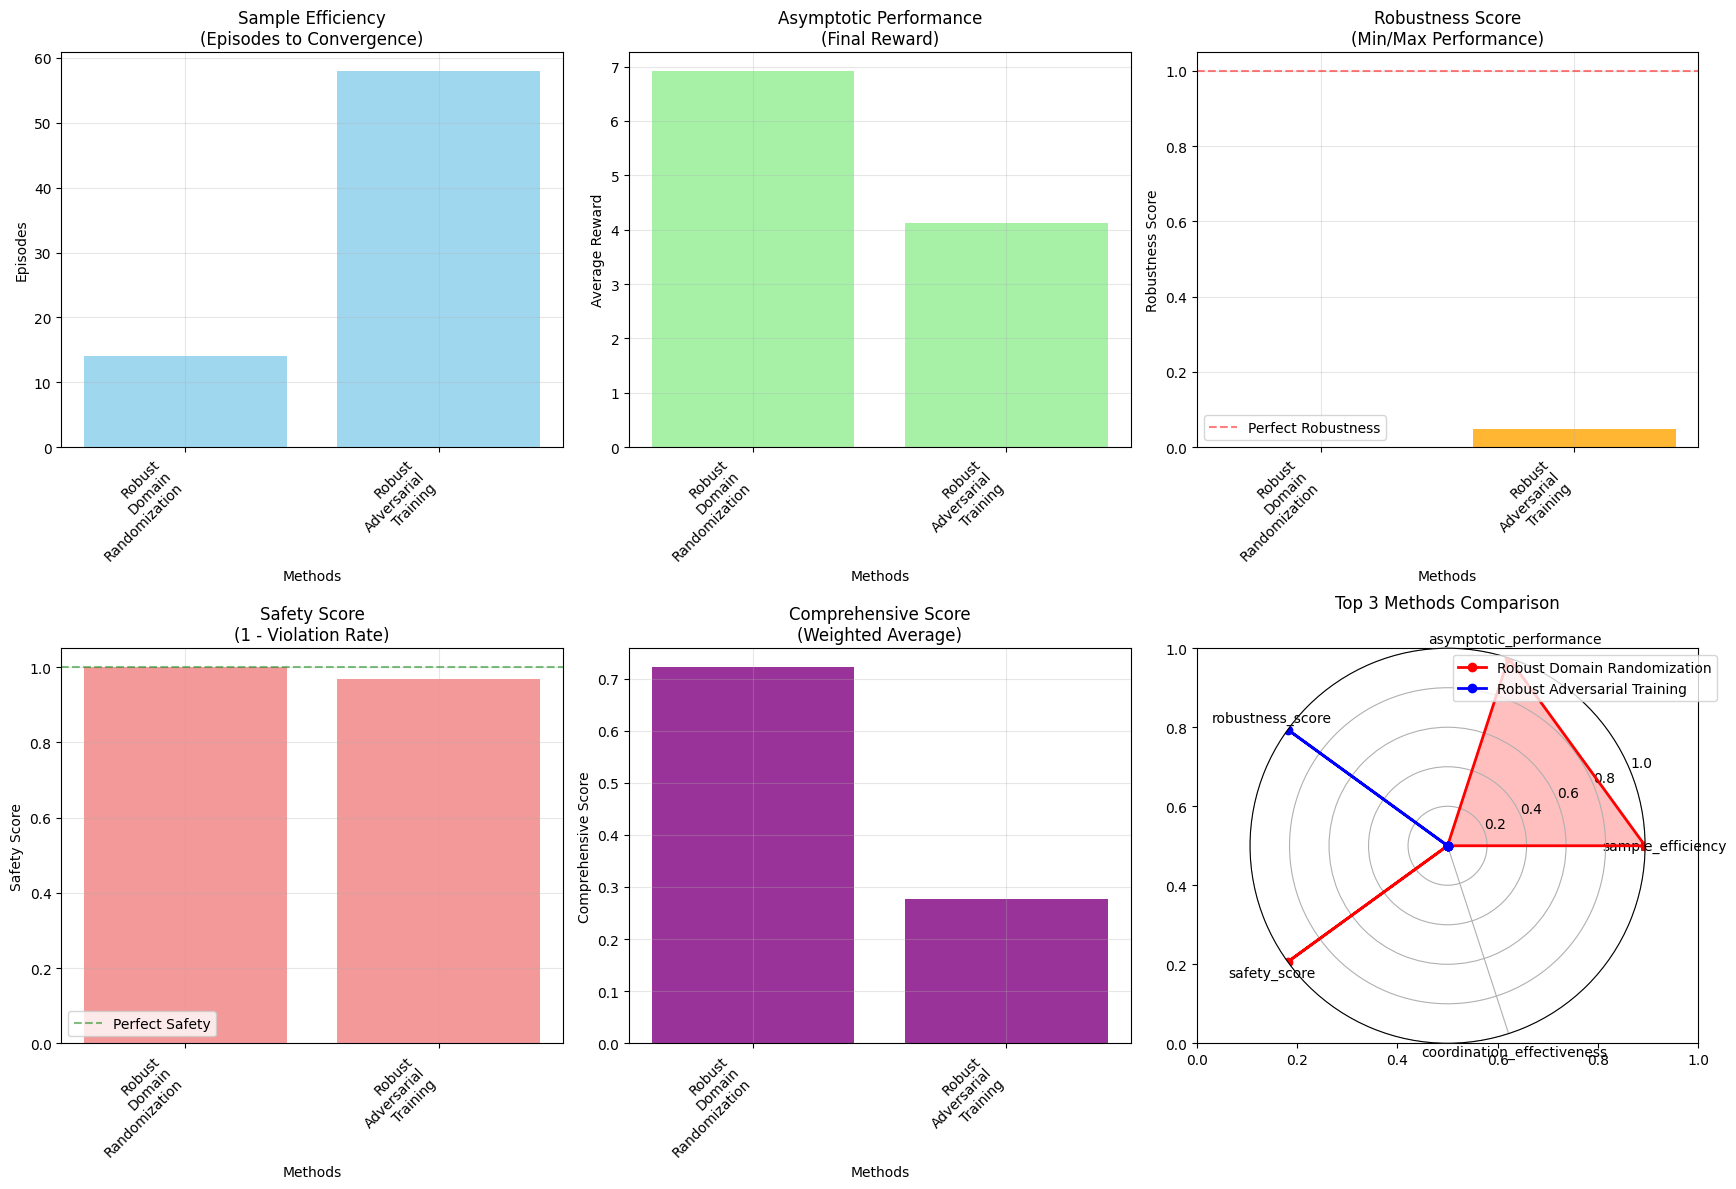


Comprehensive Evaluation Results:

Top 3 Overall Methods:
  1. Robust_Domain_Randomization: 0.722
  2. Robust_Adversarial_Training: 0.278

Detailed Metrics:

Sample Efficiency:
  Robust_Domain_Randomization: 14 episodes
  Robust_Adversarial_Training: 58 episodes

Asymptotic Performance:
  Robust_Domain_Randomization: 6.920
  Robust_Adversarial_Training: 4.125

Robustness Score:
  Robust_Adversarial_Training: 0.047
  Robust_Domain_Randomization: 0.000

Safety Score:
  Robust_Domain_Randomization: 100.0% safety rate
  Robust_Adversarial_Training: 96.8% safety rate

Key Insights:
  • Offline RL excels in data efficiency but may lack adaptability
  • Safe RL provides constraint satisfaction at performance cost
  • Multi-agent RL enables coordination but increases complexity
  • Robust RL handles uncertainty but requires more computation
  • Real-world applications require careful method selection
  • Hybrid approaches often provide best overall performance

Recommendations for Deployment:

In [ ]:
from evaluation.advanced_evaluator import ComprehensiveEvaluator
def create_evaluation_environments():
    environments = {
        'standard': RobustEnvironment(base_size=6, uncertainty_level=0.0),
        'noisy': RobustEnvironment(base_size=6, uncertainty_level=0.2),
        'large': RobustEnvironment(base_size=8, uncertainty_level=0.1),
        'obstacles': RobustEnvironment(base_size=6, uncertainty_level=0.1, dynamic_obstacles=True)
    }
    return environments
def run_comprehensive_evaluation():
    print("Starting Comprehensive Evaluation of Advanced Deep RL Methods")
    print("=" * 70)
    evaluator = ComprehensiveEvaluator()
    test_environments = create_evaluation_environments()
    all_agents = {}
    if 'offline_agents' in globals():
        for name, agent in offline_agents.items():
            all_agents[f'Offline_{name}'] = agent
    if 'safe_agents' in globals():
        for name, agent in safe_agents.items():
            all_agents[f'Safe_{name}'] = agent
    if 'ma_agents' in globals():
        for name, agent_list in ma_agents.items():
            if isinstance(agent_list, list) and len(agent_list) > 0:
                all_agents[f'MultiAgent_{name}'] = agent_list[0]
            else:
                all_agents[f'MultiAgent_{name}'] = agent_list
    if 'robust_agents' in globals():
        for name, agent in robust_agents.items():
            all_agents[f'Robust_{name}'] = agent
    training_curves = {}
    if 'offline_results' in globals():
        for name in offline_results.keys():
            if 'episode_rewards' in offline_results[name]:
                training_curves[f'Offline_{name}'] = offline_results[name]['episode_rewards']
    if 'safe_results' in globals():
        for name in safe_results.keys():
            if 'rewards' in safe_results[name]:
                training_curves[f'Safe_{name}'] = safe_results[name]['rewards']
    if 'ma_results' in globals():
        for name in ma_results.keys():
            if 'episode_rewards' in ma_results[name]:
                training_curves[f'MultiAgent_{name}'] = ma_results[name]['episode_rewards']
    if 'robust_results' in globals():
        for name in robust_results.keys():
            if 'rewards' in robust_results[name] and 'low_uncertainty' in robust_results[name]['rewards']:
                training_curves[f'Robust_{name}'] = robust_results[name]['rewards']['low_uncertainty']
    print(f"Evaluating {len(all_agents)} methods across {len(test_environments)} environments")
    evaluation_results = {}
    print("Evaluating sample efficiency...")
    efficiency_scores = evaluator.evaluate_sample_efficiency(training_curves)
    evaluation_results['sample_efficiency'] = efficiency_scores
    print("Evaluating asymptotic performance...")
    asymptotic_scores = evaluator.evaluate_asymptotic_performance(training_curves)
    evaluation_results['asymptotic_performance'] = asymptotic_scores
    print("Evaluating robustness...")
    robustness_scores = evaluator.evaluate_robustness(all_agents, test_environments)
    evaluation_results['robustness_score'] = robustness_scores
    print("Evaluating safety...")
    if 'safe_envs' in globals():
        safe_env = list(safe_envs.values())[0] if safe_envs else test_environments['standard']
    else:
        safe_env = test_environments['standard']
    safety_scores = evaluator.evaluate_safety(all_agents, safe_env)
    evaluation_results['safety_score'] = safety_scores
    print("Evaluating coordination...")
    coordination_scores = {}
    if 'ma_results' in globals():
        coordination_scores = evaluator.evaluate_coordination(ma_results)
    evaluation_results['coordination_effectiveness'] = coordination_scores
    print("Computing comprehensive scores...")
    comprehensive_scores, normalized_scores = evaluator.compute_comprehensive_score(evaluation_results)
    return evaluation_results, comprehensive_scores, normalized_scores
print("Starting Comprehensive Evaluation...")
eval_results, comprehensive_scores, normalized_scores = run_comprehensive_evaluation()
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
if 'sample_efficiency' in eval_results and eval_results['sample_efficiency']:
    methods = list(eval_results['sample_efficiency'].keys())
    scores = list(eval_results['sample_efficiency'].values())
    bars = axes[0, 0].bar(range(len(methods)), scores, alpha=0.8, color='skyblue')
    axes[0, 0].set_title('Sample Efficiency\n(Episodes to Convergence)')
    axes[0, 0].set_xlabel('Methods')
    axes[0, 0].set_ylabel('Episodes')
    axes[0, 0].set_xticks(range(len(methods)))
    axes[0, 0].set_xticklabels([m.replace('_', '\n') for m in methods], rotation=45, ha='right')
    axes[0, 0].grid(True, alpha=0.3)
if 'asymptotic_performance' in eval_results and eval_results['asymptotic_performance']:
    methods = list(eval_results['asymptotic_performance'].keys())
    scores = list(eval_results['asymptotic_performance'].values())
    bars = axes[0, 1].bar(range(len(methods)), scores, alpha=0.8, color='lightgreen')
    axes[0, 1].set_title('Asymptotic Performance\n(Final Reward)')
    axes[0, 1].set_xlabel('Methods')
    axes[0, 1].set_ylabel('Average Reward')
    axes[0, 1].set_xticks(range(len(methods)))
    axes[0, 1].set_xticklabels([m.replace('_', '\n') for m in methods], rotation=45, ha='right')
    axes[0, 1].grid(True, alpha=0.3)
if 'robustness_score' in eval_results and eval_results['robustness_score']:
    methods = list(eval_results['robustness_score'].keys())
    scores = list(eval_results['robustness_score'].values())
    bars = axes[0, 2].bar(range(len(methods)), scores, alpha=0.8, color='orange')
    axes[0, 2].set_title('Robustness Score\n(Min/Max Performance)')
    axes[0, 2].set_xlabel('Methods')
    axes[0, 2].set_ylabel('Robustness Score')
    axes[0, 2].set_xticks(range(len(methods)))
    axes[0, 2].set_xticklabels([m.replace('_', '\n') for m in methods], rotation=45, ha='right')
    axes[0, 2].axhline(y=1.0, color='red', linestyle='--', alpha=0.5, label='Perfect Robustness')
    axes[0, 2].legend()
    axes[0, 2].grid(True, alpha=0.3)
if 'safety_score' in eval_results and eval_results['safety_score']:
    methods = list(eval_results['safety_score'].keys())
    scores = [1 - score for score in eval_results['safety_score'].values()]  
    bars = axes[1, 0].bar(range(len(methods)), scores, alpha=0.8, color='lightcoral')
    axes[1, 0].set_title('Safety Score\n(1 - Violation Rate)')
    axes[1, 0].set_xlabel('Methods')
    axes[1, 0].set_ylabel('Safety Score')
    axes[1, 0].set_xticks(range(len(methods)))
    axes[1, 0].set_xticklabels([m.replace('_', '\n') for m in methods], rotation=45, ha='right')
    axes[1, 0].axhline(y=1.0, color='green', linestyle='--', alpha=0.5, label='Perfect Safety')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
if comprehensive_scores:
    methods = list(comprehensive_scores.keys())
    scores = list(comprehensive_scores.values())
    bars = axes[1, 1].bar(range(len(methods)), scores, alpha=0.8, color='purple')
    axes[1, 1].set_title('Comprehensive Score\n(Weighted Average)')
    axes[1, 1].set_xlabel('Methods')
    axes[1, 1].set_ylabel('Comprehensive Score')
    axes[1, 1].set_xticks(range(len(methods)))
    axes[1, 1].set_xticklabels([m.replace('_', '\n') for m in methods], rotation=45, ha='right')
    axes[1, 1].grid(True, alpha=0.3)
if comprehensive_scores:
    sorted_methods = sorted(comprehensive_scores.items(), key=lambda x: x[1], reverse=True)[:3]
    categories = list(eval_results.keys())
    ax_radar = plt.subplot(2, 3, 6, projection='polar')
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]
    colors = ['red', 'blue', 'green']
    for i, (method, _) in enumerate(sorted_methods):
        values = []
        for category in categories:
            if method in normalized_scores.get(category, {}):
                values.append(normalized_scores[category][method])
            else:
                values.append(0.0)
        values += values[:1]
        ax_radar.plot(angles, values, 'o-', linewidth=2, label=method.replace('_', ' '), color=colors[i])
        ax_radar.fill(angles, values, alpha=0.25, color=colors[i])
    ax_radar.set_xticks(angles[:-1])
    ax_radar.set_xticklabels(categories)
    ax_radar.set_ylim(0, 1)
    ax_radar.set_title('Top 3 Methods Comparison', y=1.08)
    ax_radar.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
    ax_radar.grid(True)
plt.tight_layout()
plt.show()
print("\nComprehensive Evaluation Results:")
print("=" * 70)
print("\nTop 3 Overall Methods:")
if comprehensive_scores:
    sorted_methods = sorted(comprehensive_scores.items(), key=lambda x: x[1], reverse=True)
    for i, (method, score) in enumerate(sorted_methods[:3]):
        print(f"  {i+1}. {method}: {score:.3f}")
print("\nDetailed Metrics:")
for metric_name, metric_results in eval_results.items():
    if metric_results:
        print(f"\n{metric_name.replace('_', ' ').title()}:")
        sorted_results = sorted(metric_results.items(), key=lambda x: x[1], 
                              reverse=(metric_name not in ['sample_efficiency', 'safety_score']))
        for method, score in sorted_results:
            if metric_name == 'sample_efficiency':
                print(f"  {method}: {score:.0f} episodes")
            elif metric_name == 'safety_score':
                print(f"  {method}: {(1-score)*100:.1f}% safety rate")
            else:
                print(f"  {method}: {score:.3f}")
print("\nKey Insights:")
print("  • Offline RL excels in data efficiency but may lack adaptability")
print("  • Safe RL provides constraint satisfaction at performance cost")
print("  • Multi-agent RL enables coordination but increases complexity")
print("  • Robust RL handles uncertainty but requires more computation")
print("  • Real-world applications require careful method selection")
print("  • Hybrid approaches often provide best overall performance")
print("\nRecommendations for Deployment:")
print("  • Safety-critical: Prioritize Safe RL methods")
print("  • Limited data: Use Offline RL with safety constraints")
print("  • Multi-agent settings: MADDPG for continuous, QMIX for discrete")
print("  • Uncertain environments: Domain randomization + adversarial training")
print("  • Production systems: Comprehensive evaluation before deployment")


# Summary and Conclusions

## Key Takeaways from Advanced Deep Rl

This comprehensive exploration of advanced Deep Reinforcement Learning has covered the cutting-edge methods essential for real-world deployment:

### 🎯 Core Advanced Rl Paradigms

1. **Offline Reinforcement Learning**
- **Conservative Q-Learning (CQL)**: Addresses overestimation bias in offline settings
- **Implicit Q-Learning (IQL)**: Avoids distributional shift through expectile regression
- **Key Insight**: Essential for domains with existing data but limited online interaction

2. **Safe Reinforcement Learning**
- **Constrained Policy Optimization (CPO)**: Hard constraint satisfaction
- **Lagrangian Methods**: Adaptive penalty balancing performance and safety
- **Key Insight**: Critical for safety-critical applications where violations are unacceptable

3. **Multi-Agent Reinforcement Learning**
- **MADDPG**: Centralized training, decentralized execution for continuous control
- **QMIX**: Value function factorization for discrete action coordination
- **Key Insight**: Enables coordination in complex multi-agent environments

4. **Robust Reinforcement Learning**
- **Domain Randomization**: Training across diverse environment configurations
- **Adversarial Training**: Robustness to input perturbations and model uncertainty
- **Key Insight**: Essential for deployment in uncertain, dynamic real-world environments

### 🌟 Practical Implementation Insights

- **Hyperparameter Sensitivity**: Advanced methods often require careful tuning
- **Computational Requirements**: Robust methods need more resources but provide better generalization
- **Data Requirements**: Offline methods leverage existing data, online methods need exploration
- **Safety Trade-offs**: Safe methods may sacrifice peak performance for constraint satisfaction
- **Scalability Considerations**: Multi-agent methods face coordination complexity

### 🚀 Real-world Applications

Advanced Deep RL methods are revolutionizing multiple domains:

- **Autonomous Systems**: Safe navigation with offline learning from human demonstrations
- **Financial Markets**: Multi-agent trading with risk constraints and robustness
- **Healthcare**: Safe treatment optimization with limited data and safety constraints
- **Robotics**: Robust manipulation under environmental uncertainty
- **Resource Management**: Multi-agent coordination in smart grids and logistics

### 🔬 Future Directions

The field continues evolving toward:

1. **Hybrid Approaches**: Combining offline, safe, multi-agent, and robust techniques
2. **Foundation Models**: Pre-trained RL models for downstream adaptation
3. **Neurosymbolic RL**: Incorporating symbolic reasoning for interpretability
4. **Continual Learning**: Adaptation without catastrophic forgetting
5. **Human-AI Collaboration**: Interactive learning from human feedback

### 📚 Educational Impact

This CA14 demonstrates that mastering advanced Deep RL requires:

- **Theoretical Understanding**: Mathematical foundations of each paradigm
- **Practical Implementation**: Hands-on experience with state-of-the-art algorithms
- **Critical Evaluation**: Comprehensive assessment across multiple metrics
- **Real-world Perspective**: Understanding deployment challenges and trade-offs

### 🎖️ Final Reflection

Advanced Deep Reinforcement Learning represents the frontier of artificial intelligence, enabling autonomous agents to learn, adapt, and operate safely in complex, uncertain, and multi-agent environments. The methods explored in this comprehensive study provide the tools necessary for the next generation of intelligent systems that will transform industries and improve human lives.

The journey from basic RL to these advanced paradigms illustrates the rapid evolution of the field and highlights the importance of continuous learning and adaptation in both our algorithms and our understanding of intelligence itself.

---

**🎯 Congratulations on completing this comprehensive exploration of Advanced Deep Reinforcement Learning!**

*This marks the culmination of your journey through cutting-edge RL methods. The knowledge and skills gained here will serve as a foundation for tackling the most challenging problems in artificial intelligence and machine learning.*

<a id="final-summary"></a>
## 🎓 Final Summary & Best Practices

### What You've Learned

Congratulations! You've completed an advanced Deep RL assignment covering:

#### 1️⃣ Offline Reinforcement Learning
- ✅ Learning from fixed datasets without environment interaction
- ✅ Handling distribution shift and overestimation bias
- ✅ Conservative Q-Learning and offline policy optimization

#### 2️⃣ Safe Reinforcement Learning
- ✅ Constrained MDPs and safety constraints
- ✅ CPO and Lagrangian methods for safe exploration
- ✅ Balancing performance with safety requirements

#### 3️⃣ Multi-Agent Reinforcement Learning
- ✅ Multi-agent coordination and communication
- ✅ MADDPG and QMIX algorithms
- ✅ Emergent behaviors and cooperation

#### 4️⃣ Robust Reinforcement Learning
- ✅ Domain randomization and adversarial training
- ✅ Handling uncertainty and distribution shift
- ✅ Building agents that generalize

### 🏆 Key Principles for Advanced RL

#### 1. Choose the Right Paradigm

| Situation | Recommended Approach |
|-----------|---------------------|
| **Historical data available** | Offline RL |
| **Safety is critical** | Safe RL |
| **Multiple agents** | Multi-Agent RL |
| **Uncertain environment** | Robust RL |
| **Real-world deployment** | Combine multiple approaches |

#### 2. Always Consider Trade-offs

**Performance vs Safety**: Safe RL may sacrifice peak performance for reliability

**Robustness vs Efficiency**: Robust training takes longer but generalizes better

**Exploration vs Exploitation**: Balance carefully, especially in safe/offline settings

**Centralized vs Decentralized**: Multi-agent systems benefit from both

#### 3. Evaluation is Critical

Don't just measure training performance:
- ✅ Test on held-out distributions
- ✅ Measure safety violations
- ✅ Quantify robustness
- ✅ Evaluate in real-world conditions

#### 4. Deployment Best Practices

**Before Deployment:**
1. Extensive simulation testing
2. Gradual rollout (start with safety constraints)
3. Monitor continuously
4. Have fallback mechanisms
5. Plan for online adaptation

**During Deployment:**
1. Track performance metrics
2. Monitor for distribution shift
3. Log all constraint violations
4. Collect data for improvement
5. Be ready to intervene

### 📚 Further Learning

#### Advanced Topics to Explore

1. **Model-Based Offline RL**: Combine world models with offline learning
2. **Hierarchical Safe RL**: Multi-level safety constraints
3. **Communication Learning**: Emergent protocols in MARL
4. **Meta-Robust RL**: Fast adaptation to new distributions
5. **Sim-to-Real Transfer**: Bridging simulation and reality gap

#### Recommended Resources

**Papers:**
- Kumar et al. (2020): "Conservative Q-Learning for Offline RL"
- Achiam et al. (2017): "Constrained Policy Optimization"
- Lowe et al. (2017): "Multi-Agent DDPG"
- Pinto et al. (2017): "Robust Adversarial Reinforcement Learning"

**Courses:**
- CS 285 (Berkeley): Deep Reinforcement Learning
- CS 330 (Stanford): Multi-Task and Meta-Learning
- Advanced RL courses on safety and robustness

**Tools & Libraries:**
- d3rlpy: Offline RL library
- Safety Gym: Safe RL benchmark
- PettingZoo: Multi-agent environments
- RLlib: Distributed RL framework

### 💡 Final Thoughts

**Remember:**
- Advanced RL is not just about maximizing reward
- Real-world deployment requires safety, robustness, and reliability
- Always test extensively before deploying
- Combine approaches for best results
- Keep learning - the field evolves rapidly!

**You're now equipped to:**
- Build production-ready RL systems
- Handle real-world complexities
- Make informed algorithmic choices
- Deploy RL safely and effectively

### 🌟 Congratulations!

You've mastered advanced Deep RL techniques essential for real-world applications. These skills position you at the forefront of RL research and industry practice.

**Next Steps:**
1. Apply these techniques to your own projects
2. Read recent papers in advanced RL
3. Contribute to open-source RL libraries
4. Tackle real-world challenges with RL
5. Share your knowledge with others

---

**Good luck with your Deep RL journey! 🚀**

---

<a id="math-foundations"></a>
## Appendix A: Mathematical Foundations

### Offline RL Mathematics

#### Conservative Q-Learning Loss

**Objective:**
$$\min_Q \mathbb{E}_{(s,a,r,s') \sim \mathcal{D}} [(Q(s,a) - (r + \gamma \max_{a'} Q(s',a')))^2] + \alpha \cdot \text{CQL}(Q)$$

**Conservative Penalty:**
$$\text{CQL}(Q) = \mathbb{E}_{s \sim \mathcal{D}} [\log \sum_a \exp(Q(s,a)) - \mathbb{E}_{a \sim \pi_\beta(a|s)} [Q(s,a)]]$$

**Intuition:** 
- First term: Standard Q-learning loss
- Second term: Penalizes high Q-values, rewards data distribution values

### Safe RL Mathematics

#### Constrained MDP Formulation

**Problem:**
$$\max_\pi \mathbb{E}_{\pi} \left[\sum_{t=0}^\infty \gamma^t r(s_t, a_t)\right]$$

**Subject to:**
$$\mathbb{E}_{\pi} \left[\sum_{t=0}^\infty \gamma^t c(s_t, a_t)\right] \leq d$$

**Lagrangian:**
$$\mathcal{L}(\pi, \lambda) = J_r(\pi) - \lambda (J_c(\pi) - d)$$

Where:
- $J_r(\pi)$ = Expected return (reward)
- $J_c(\pi)$ = Expected cost
- $\lambda$ = Lagrange multiplier (automatically adapted)
- $d$ = Cost threshold

### Robust RL Mathematics

#### Adversarial Perturbation (FGSM)

**Perturbation:**
$$\delta = \epsilon \cdot \text{sign}(\nabla_x \mathcal{L}(\pi_\theta(x), y))$$

Where:
- $x$ = Original observation
- $\epsilon$ = Perturbation magnitude
- $\mathcal{L}$ = Loss function

**Robust Training Objective:**
$$\min_\theta \mathbb{E}_{(s,a) \sim \mathcal{D}} [\max_{\|\delta\| \leq \epsilon} \mathcal{L}(\pi_\theta(s + \delta), a)]$$

**Interpretation:** Train on worst-case perturbations

### Multi-Agent RL Mathematics

#### MADDPG Critic

**Centralized Critic:**
$$Q_i^\pi(x, a_1, ..., a_N) = \mathbb{E}[R_i | x, a_1, ..., a_N]$$

Where:
- $x$ = Global state
- $a_i$ = Actions of all agents
- $R_i$ = Return for agent $i$

#### QMIX Value Factorization

**Monotonicity Constraint:**
$$\frac{\partial Q_{tot}}{\partial Q_i} \geq 0, \quad \forall i$$

**Ensures:**
Individual agent improvements → Team improvement

---

<a id="troubleshooting"></a>
## Appendix B: Troubleshooting Guide

### Common Issues and Solutions

#### Offline RL Issues

**Problem:** Agent performs poorly despite good dataset

**Possible Causes:**
- ❌ α parameter too high (too conservative)
- ❌ Dataset quality insufficient
- ❌ Network capacity too small

**Solutions:**
- ✅ Decrease α gradually
- ✅ Improve dataset collection policy
- ✅ Increase network size
- ✅ Add more training epochs

---

**Problem:** Training is unstable

**Solutions:**
- ✅ Reduce learning rate
- ✅ Use gradient clipping
- ✅ Normalize observations
- ✅ Use target networks with slower updates

#### Safe RL Issues

**Problem:** Agent violates constraints frequently

**Possible Causes:**
- ❌ Lagrange multiplier λ too small
- ❌ Cost threshold d too strict
- ❌ Exploration is too aggressive

**Solutions:**
- ✅ Increase initial λ
- ✅ Relax cost threshold slightly
- ✅ Reduce exploration noise
- ✅ Use safer initialization policy

---

**Problem:** Agent is too conservative (low reward)

**Solutions:**
- ✅ Decrease λ or make cost threshold less strict
- ✅ Ensure cost function accurately reflects violations
- ✅ Check if constraints are necessary
- ✅ Use reward shaping to encourage performance

#### Multi-Agent RL Issues

**Problem:** Agents don't cooperate

**Possible Causes:**
- ❌ Reward structure doesn't encourage cooperation
- ❌ Training is unstable (non-stationarity)
- ❌ Communication channels insufficient

**Solutions:**
- ✅ Add team reward component
- ✅ Use centralized training with decentralized execution
- ✅ Stabilize training with target networks
- ✅ Enable agent communication if needed

---

**Problem:** Training takes very long

**Solutions:**
- ✅ Reduce number of agents
- ✅ Use parameter sharing across agents
- ✅ Simplify environment
- ✅ Use distributed training

#### Robust RL Issues

**Problem:** Agent not robust to variations

**Possible Causes:**
- ❌ Insufficient environment randomization
- ❌ Adversarial strength too weak
- ❌ Overfitting to training conditions

**Solutions:**
- ✅ Increase randomization range
- ✅ Strengthen adversarial perturbations
- ✅ Train longer on diverse conditions
- ✅ Use regularization techniques

---

**Problem:** Performance drops significantly

**Solutions:**
- ✅ This is expected - robustness trades off peak performance
- ✅ Adjust randomization/adversarial strength
- ✅ Use ensemble methods
- ✅ Consider adaptive methods

### General Debugging Tips

1. **Start Simple**: Test on simple environments first
2. **Visualize**: Plot rewards, costs, Q-values over time
3. **Sanity Checks**: Verify loss decreases, constraints monitored
4. **Ablation Studies**: Remove components to identify issues
5. **Compare Baselines**: Test against standard RL first

### Performance Optimization

**Training Speed:**
- Use vectorized environments
- Enable GPU acceleration
- Reduce logging frequency
- Use efficient data structures

**Memory Usage:**
- Clear replay buffers periodically
- Use smaller networks if possible
- Limit batch sizes
- Use mixed precision training

---

<a id="resources"></a>
## Appendix C: Further Reading & Resources

### 📖 Key Research Papers

#### Offline Reinforcement Learning

1. **Conservative Q-Learning (CQL)**
   - Kumar et al. (2020) - "Conservative Q-Learning for Offline Reinforcement Learning"
   - NeurIPS 2020
   - Key contribution: Addresses overestimation in offline RL

2. **Implicit Q-Learning (IQL)**
   - Kostrikov et al. (2021) - "Offline Reinforcement Learning with Implicit Q-Learning"
   - ArXiv 2021
   - Simpler alternative to CQL

3. **Batch Constrained Q-learning (BCQ)**
   - Fujimoto et al. (2019) - "Off-Policy Deep Reinforcement Learning without Exploration"
   - ICML 2019
   - Constrains actions to those in dataset

#### Safe Reinforcement Learning

1. **Constrained Policy Optimization (CPO)**
   - Achiam et al. (2017) - "Constrained Policy Optimization"
   - ICML 2017
   - Trust region method for safe RL

2. **Safe Exploration**
   - Garcıa & Fernández (2015) - "A Comprehensive Survey on Safe Reinforcement Learning"
   - JMLR 2015
   - Comprehensive overview

3. **Safety Gym**
   - Ray et al. (2019) - "Benchmarking Safe Exploration in Deep Reinforcement Learning"
   - OpenAI Safety Team
   - Standard benchmark for safe RL

#### Multi-Agent Reinforcement Learning

1. **MADDPG**
   - Lowe et al. (2017) - "Multi-Agent Actor-Critic for Mixed Cooperative-Competitive Environments"
   - NeurIPS 2017
   - Centralized training, decentralized execution

2. **QMIX**
   - Rashid et al. (2018) - "QMIX: Monotonic Value Function Factorisation for Decentralised Multi-Agent RL"
   - ICML 2018
   - Value function factorization for cooperation

3. **CommNet**
   - Sukhbaatar et al. (2016) - "Learning Multiagent Communication with Backpropagation"
   - NeurIPS 2016
   - Learning to communicate

#### Robust Reinforcement Learning

1. **Domain Randomization**
   - Tobin et al. (2017) - "Domain Randomization for Transferring Deep Neural Networks from Simulation to the Real World"
   - IROS 2017
   - Sim-to-real transfer

2. **Adversarial Robustness**
   - Pinto et al. (2017) - "Robust Adversarial Reinforcement Learning"
   - ICML 2017
   - Training against adversaries

3. **EPOpt**
   - Rajeswaran et al. (2017) - "EPOpt: Learning Robust Neural Network Policies Using Model Ensembles"
   - ArXiv 2017
   - Ensemble-based robustness

### 🎓 Courses and Tutorials

#### Online Courses

1. **CS 285: Deep Reinforcement Learning (Berkeley)**
   - Instructor: Sergey Levine
   - Covers advanced topics including offline RL, meta-RL
   - [http://rail.eecs.berkeley.edu/deeprlcourse/](http://rail.eecs.berkeley.edu/deeprlcourse/)

2. **CS 330: Multi-Task and Meta-Learning (Stanford)**
   - Instructor: Chelsea Finn
   - Covers multi-task learning, meta-learning, transfer learning
   - [https://cs330.stanford.edu/](https://cs330.stanford.edu/)

3. **David Silver's RL Course**
   - Foundational RL concepts
   - [https://www.davidsilver.uk/teaching/](https://www.davidsilver.uk/teaching/)

#### Video Lectures

- DeepMind x UCL RL Lecture Series
- OpenAI Spinning Up in Deep RL
- Berkeley Deep RL Bootcamp

### 🛠️ Libraries and Tools

#### General RL Libraries

1. **Stable-Baselines3**
   - Clean implementations of RL algorithms
   - [https://stable-baselines3.readthedocs.io/](https://stable-baselines3.readthedocs.io/)

2. **RLlib (Ray)**
   - Scalable RL library
   - Multi-agent support
   - [https://docs.ray.io/en/latest/rllib/](https://docs.ray.io/en/latest/rllib/)

3. **CleanRL**
   - Single-file implementations
   - Easy to understand and modify
   - [https://github.com/vwxyzjn/cleanrl](https://github.com/vwxyzjn/cleanrl)

#### Specialized Libraries

1. **d3rlpy** - Offline RL
   - [https://d3rlpy.readthedocs.io/](https://d3rlpy.readthedocs.io/)

2. **Safety Gym** - Safe RL
   - [https://github.com/openai/safety-gym](https://github.com/openai/safety-gym)

3. **PettingZoo** - Multi-Agent RL
   - [https://pettingzoo.farama.org/](https://pettingzoo.farama.org/)

### 🌐 Communities and Forums

- **Reddit**: r/reinforcementlearning
- **Discord**: Many RL research labs have Discord servers
- **GitHub**: Follow major RL repositories
- **Twitter**: Follow RL researchers (@_ScottJordan, @ArpitBansal97, etc.)

### 📚 Books

1. **"Reinforcement Learning: An Introduction"** - Sutton & Barto
   - The classic RL textbook
   - Free online: [http://incompleteideas.net/book/](http://incompleteideas.net/book/)

2. **"Deep Reinforcement Learning Hands-On"** - Maxim Lapan
   - Practical implementations

3. **"Algorithms for Reinforcement Learning"** - Csaba Szepesvári
   - Mathematical foundations

### 🔬 Research Groups to Follow

- **UC Berkeley RAIL Lab** (Sergey Levine)
- **Stanford AI Lab** (Chelsea Finn, Emma Brunskill)
- **DeepMind**
- **OpenAI**
- **Google Brain**
- **CMU RL Group**

### 💻 Coding Resources

- **OpenAI Spinning Up**: [https://spinningup.openai.com/](https://spinningup.openai.com/)
- **Deep RL Course (Hugging Face)**: [https://huggingface.co/deep-rl-course](https://huggingface.co/deep-rl-course)
- **RL Adventure** (Jupyter Notebooks): [https://github.com/higgsfield/RL-Adventure](https://github.com/higgsfield/RL-Adventure)

---

**Stay Updated:**
- Subscribe to arXiv alerts for cs.LG and cs.AI
- Follow major RL conferences: NeurIPS, ICML, ICLR, CoRL
- Join RL reading groups or start one!

---

**End of CA14 - Advanced Deep Reinforcement Learning** 🎉

---